In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import norm

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read treatment1 data into dataframe
T1_no_diabetes =pd.read_excel(r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Treatment group 1.xlsx',sheet_name='No_diabetes')
T1_pre_diabetes = pd.read_excel(r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Treatment group 1.xlsx',sheet_name='Pre-diabetes')
T1_diabetes = pd.read_excel(r'D:\OneDrive - National University of Sciences & Technology\Desktop\upwork\MedicalStats\Treatment group 1.xlsx',sheet_name='Diabetes')

In [3]:
#make one datafrafme of all three dataframes
T1_no_diabetes['no_diabetes'] = 1
T1_no_diabetes['pre_diabetes'] = 0
T1_no_diabetes['diabetes'] = 0

T1_pre_diabetes['no_diabetes'] = 0
T1_pre_diabetes['pre_diabetes'] = 1
T1_pre_diabetes['diabetes'] = 0

T1_diabetes['no_diabetes'] = 0
T1_diabetes['pre_diabetes'] = 0
T1_diabetes['diabetes'] = 1

treatment_1 = pd.concat([T1_no_diabetes, T1_pre_diabetes, T1_diabetes], ignore_index=True)
treatment_1.head()


,No diabetes,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,...,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,Pre-Diabetes,Diabetes
0,1.0,0,1,1020062281,103,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
1,1.0,1,0,1020085314,98,8,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
2,1.0,0,1,1020047252,98,4,22.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
3,1.0,0,1,1019318116,97,12,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN
4,1.0,0,1,1019349783,97,7,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN


In [4]:
# Drop the extra columns
treatment_1 = treatment_1.drop(columns=['No diabetes', 'Pre-Diabetes', 'Diabetes'])

# Fill NaN values with 0 in specified columns
columns_to_fill = ['Length of Stay','Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'R96.*', 'TOD', 'INTENSIV']
treatment_1[columns_to_fill] = treatment_1[columns_to_fill].fillna(0)

# Display the first few rows of the cleaned dataframe
treatment_1.head()


,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,T84.*,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes
0,0,1,1020062281,103,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,1,0,1020085314,98,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
2,0,1,1020047252,98,4,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,0,1,1019318116,97,12,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,0,1,1019349783,97,7,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0


In [5]:
#treatment_1.to_excel('treatment1.xlsx', index=False)

In [6]:
# Checking for NaN values in each column
nan_values = treatment_1.isna().sum()
nan_values

Gender (M)          0
Gender (F)          0
Case Number         0
Age                 0
Length of Stay      0
BMI               621
Fall                0
U69.*               0
T81.*               0
T84.*               0
N17.*               0
I21.*               0
R96.*               0
TOD                 0
INTENSIV            0
no_diabetes         0
pre_diabetes        0
diabetes            0
dtype: int64

In [7]:
#adding age bins to check for age distribution
# Define age groups
age_groups = ['18-40', '40-60', '60+']



# Define bins and labels for the age groups
bins = [18, 40, 60, treatment_1['Age'].max()]
labels = age_groups

# Create a new column 'age_group' based on the age groups defined
treatment_1['age_group'] = pd.cut(treatment_1['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
treatment_1.head()


,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,T84.*,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,age_group
0,0,1,1020062281,103,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,60+
1,1,0,1020085314,98,8,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,60+
2,0,1,1020047252,98,4,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,60+
3,0,1,1019318116,97,12,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,60+
4,0,1,1019349783,97,7,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,60+


In [8]:
# Finding the rows where the 'age_group' column has NaN values
nan_age_group_rows = treatment_1[treatment_1['age_group'].isna()]
nan_age_group_rows


,Gender (M),Gender (F),Case Number,Age,Length of Stay,BMI,Fall,U69.*,T81.*,T84.*,N17.*,I21.*,R96.*,TOD,INTENSIV,no_diabetes,pre_diabetes,diabetes,age_group


In [9]:
# Calculate descriptive statistics for each group
desc_stats = treatment_1.groupby(['no_diabetes', 'pre_diabetes', 'diabetes']).agg(
    mean_age=('Age', 'mean'),
    median_age=('Age', 'median'),
    std_age=('Age', 'std'),
    mean_length_of_stay=('Length of Stay', 'mean'),
    median_length_of_stay=('Length of Stay', 'median'),
    std_length_of_stay=('Length of Stay', 'std'),
    mean_BMI=('BMI', 'mean'),
    median_BMI=('BMI', 'median'),
    std_BMI=('BMI', 'std'),
)

# Display the descriptive statistics
desc_stats.reset_index()


,no_diabetes,pre_diabetes,diabetes,mean_age,median_age,std_age,mean_length_of_stay,median_length_of_stay,std_length_of_stay,mean_BMI,median_BMI,std_BMI
0,0,0,1,70.229032,71.0,12.745040,12.196774,8.0,11.954471,30.380513,28.6,8.405437
1,0,1,0,69.514493,70.0,12.382726,11.731884,8.0,9.313313,29.664151,27.7,9.793819
2,1,0,0,56.722551,58.0,20.040927,10.073636,7.0,9.533382,26.728909,25.4,7.009980


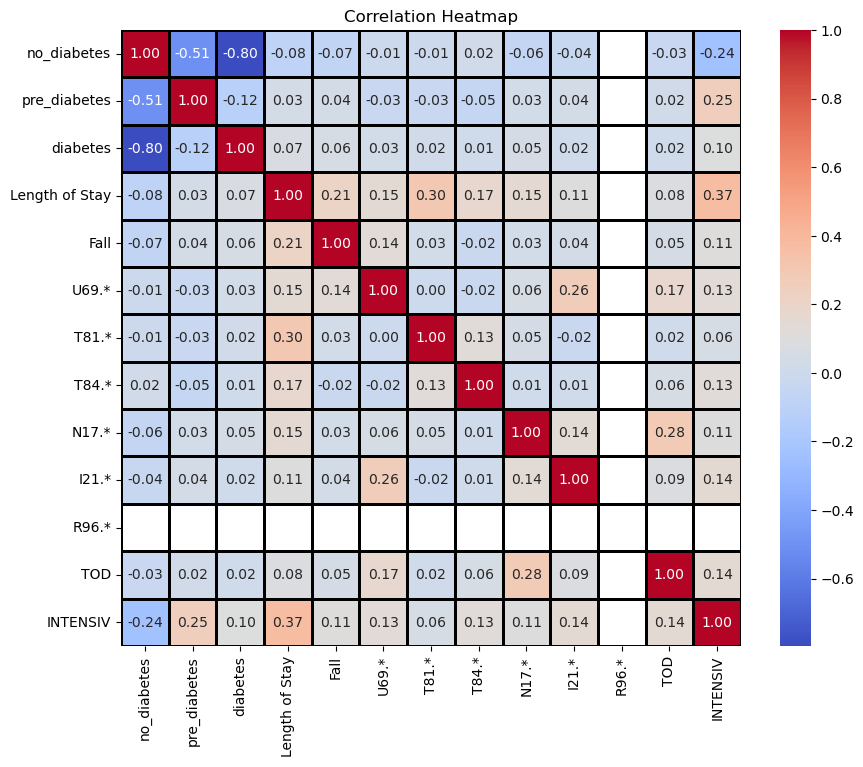

In [10]:
# Heatmap of conditions with complications
#Select the columns to be used for the heatmap
cols = ['no_diabetes', 'pre_diabetes', 'diabetes', 'Length of Stay', 'Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'R96.*', 'TOD', 'INTENSIV']
correlation_matrix = treatment_1[cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')

# Set title and show plot
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Perform one-way ANOVA for any variable of interest
def one_way_anova(df, variable_of_interest):
    f_statistic, p_value = f_oneway(
        df[variable_of_interest][df['no_diabetes'] == 1],
        df[variable_of_interest][df['pre_diabetes'] == 1],
        df[variable_of_interest][df['diabetes'] == 1]
    )
    return f_statistic, p_value

In [12]:
# Perform t-test for any variable of interest run for both pre_diabtes and diabetes vs no_diabetes
def t_test(df, variable_of_interest):
    t_statistic1, p_value1 = ttest_ind(
        df[variable_of_interest][df['pre_diabetes'] == 1],
        df[variable_of_interest][df['no_diabetes'] == 1]
    )
    t_statistic2, p_value2 = ttest_ind(
        df[variable_of_interest][df['diabetes'] == 1],
        df[variable_of_interest][df['no_diabetes'] == 1]
    )
#compile in dataframe
    t_test_results = pd.DataFrame({
        't_statistic': [t_statistic1, t_statistic2],
        'p_value': [p_value1, p_value2]
    }, index=['pre_diabetes vs no_diabetes', 'diabetes vs no_diabetes'])

    #print results
    return t_test_results

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def tukey_hsd(df, variable_of_interest):
    # Create a new column 'group' to indicate the group of each row (no_diabetes, pre_diabetes, diabetes)
    df['group'] = df.apply(lambda row: 'no_diabetes' if row['no_diabetes'] == 1 else ('pre_diabetes' if row['pre_diabetes'] == 1 else 'diabetes'), axis=1)
    tukey_results = pairwise_tukeyhsd(df[variable_of_interest], df['group'])
    
    # Print summary of results
    print(tukey_results.summary())

    return tukey_results

In [14]:
# Visualize the tukey results for any variable of interest using a foreset plot
def visualize_tukey_results(tukey_results, df, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    tukey_results.plot_simultaneous() # Plot group confidence intervals
    
    # Calculating the mean
    mean = df[variable_of_interest].mean() # Calculate the mean of the data
    plt.vlines(x=mean, ymin=-0.5, ymax=2.5, color="red") # Add a vertical line at the mean of the data

    # Add a title and axis labels
    xlabel = "Mean " + variable_of_interest # Define x-axis label
    ylabel = "Group" # Define y-axis label
    plt.xlabel(xlabel) # Set x-axis label
    plt.ylabel(ylabel) # Set y-axis label

    plt.savefig('visualize_tukey_results.png') # Save the figure as a PNG file
    plt.show() # Show the figure

In [15]:
#Perform Covariance analysis for any variable of interest
from statsmodels.formula.api import ols

def covariance_analysis(df, variable_of_interest):
    # Adding age as a static control variable
    cov_model = ols(f"Q('{variable_of_interest}') ~ C(no_diabetes) + C(pre_diabetes) + C(diabetes) + Age", data=df).fit()
    cov_anova_table = sm.stats.anova_lm(cov_model, typ=2)
    return cov_anova_table 

In [16]:
# Running a covariance analysis with an interaction term between age and the diabetes group
def interaction_analysis(df, variable_of_interest):
    # Adding age as a static control variable
    interaction_formula = f"Q('{variable_of_interest}') ~ C(no_diabetes) + C(pre_diabetes) + C(diabetes) + Age + C(diabetes):Age"
    interaction_model = ols(interaction_formula, data=df).fit()
    interaction_anova_table = sm.stats.anova_lm(interaction_model, typ=2)
    return interaction_anova_table

In [17]:
#testing for length of stay
interaction_analysis(treatment_1, 'Length of Stay')

,sum_sq,df,F,PR(>F)
C(no_diabetes),67.434382,1.0,0.686978,4.072948e-01
C(pre_diabetes),254.953155,1.0,2.597299,1.072067e-01
C(diabetes),2555.044820,1.0,26.029157,3.686976e-07
Age,1365.798990,1.0,13.913884,1.968095e-04
C(diabetes):Age,34.070902,1.0,0.347092,5.558314e-01
Residual,192787.959387,1964.0,NaN,NaN


In [18]:
#Run interaction analysis with of any variable of interest 
def interaction_analysis2(df, variable_of_interest):
    # testing for age for diabetes group
    interaction_formula1 = f"Q('{variable_of_interest}') ~ C(no_diabetes) + C(diabetes) + Age + C(diabetes):C(Age)"
    interaction_model1 = ols(interaction_formula1, data=df).fit()
    interaction_anova_table1 = sm.stats.anova_lm(interaction_model1, typ=2)
    
    #print(interaction_anova_table1)

    #testing for age for pre-diabetes group
    interaction_formula2 = f"Q('{variable_of_interest}') ~ C(no_diabetes) + C(pre_diabetes) + Age + C(pre_diabetes):C(Age)"
    interaction_model2 = ols(interaction_formula2, data=df).fit()
    interaction_anova_table2 = sm.stats.anova_lm(interaction_model2, typ=2)
    
    #combine results into a dataframe oj just the interation terms
    interaction_anova_table = pd.DataFrame({
        'dfn': [interaction_anova_table1['df'][3], interaction_anova_table2['df'][3]],
        'dfd': [interaction_anova_table1['df'][4], interaction_anova_table2['df'][4]],
        'F': [interaction_anova_table1['F'][0], interaction_anova_table2['F'][0]],
        'PR(>F)': [interaction_anova_table1['PR(>F)'][0], interaction_anova_table2['PR(>F)'][0]]
    }, index=['diabetes', 'pre_diabetes'])
    
    return interaction_anova_table

In [19]:
#plot scatter plot for interaction analysis
def plot_interaction_analysis(df, variable_of_interest):
    # Creating a new column to represent the diabetes group
    conditions = [
        (df['no_diabetes'] == 1),
        (df['pre_diabetes'] == 1),
        (df['diabetes'] == 1)
    ]
    choices = ['no_diabetes', 'pre_diabetes', 'diabetes']
    
    df['diabetes_group'] = np.select(conditions, choices, default='unknown')
    
    # Scatter plot with regression line
    plt.figure(figsize=(10, 8))
    sns.lmplot(x='Age', y=variable_of_interest, hue='diabetes_group', data=df, height=8, aspect=1.5)
    
    # Define title and axis labels
    plt.title(f"Scatter Plot of {variable_of_interest} vs Age")
    plt.xlabel("Age")
    plt.ylabel(variable_of_interest)
    
    plt.savefig('plot_interaction_analysis.png') # Save the figure as a PNG file
    plt.show()


In [20]:
from statsmodels.formula.api import ols

#perform residual adjustment for any variable of interest

def residual_adjustment(df, variable_of_interest):
    # Adding age as a static control variable
    formula = f"Q('{variable_of_interest}') ~ C(no_diabetes) + C(pre_diabetes) + C(diabetes) + Age" # Using Q() to quote variable names with spaces
    res_model = ols(formula, data=df).fit()
    df['residuals'] = res_model.resid
    return df


In [21]:
#plot residuals vs age tp explore age-related patterns
def plot_residuals_vs_age(df, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    sns.scatterplot(x='Age', y='residuals', hue='diabetes', data=df) # Create scatterplot of residuals vs age
    plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0
    plt.show()

In [22]:
#plot histogram of residuals to check for normality
def plot_residuals_histogram(df, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    sns.histplot(data=df, x='residuals', hue='diabetes', kde=True) # Create histogram of residuals
    plt.axvline(x=0, color='red', linestyle='--') # Add a vertical line at x=0
    plt.show()
    

In [23]:
from scipy.stats import chi2_contingency
# Perform chi-square test for any variable of interest 
def chi_square_test(df, variable_of_interest):
    # Create a contingency table for each condition 
    contingency_table_no_diabetes = pd.crosstab(df[variable_of_interest], df['no_diabetes'])
    contingency_table_pre_diabetes = pd.crosstab(df[variable_of_interest], df['pre_diabetes'])
    contingency_table_diabetes = pd.crosstab(df[variable_of_interest], df['diabetes'])

    # Perform the chi-square test for each condition
    chi2_no_diabetes, p_value_no_diabetes, dof_no_diabetes, _ = chi2_contingency(contingency_table_no_diabetes)
    chi2_pre_diabetes, p_value_pre_diabetes, dof_pre_diabetes, _ = chi2_contingency(contingency_table_pre_diabetes)
    chi2_diabetes, p_value_diabetes, dof_diabetes, _ = chi2_contingency(contingency_table_diabetes)

    #compile the results into a dataframe
    chi_square_results = pd.DataFrame({
        'condition': ['no_diabetes', 'pre_diabetes', 'diabetes'],
        'chi2': [chi2_no_diabetes, chi2_pre_diabetes, chi2_diabetes],
        'p_value': [p_value_no_diabetes, p_value_pre_diabetes, p_value_diabetes],
        'dof': [dof_no_diabetes, dof_pre_diabetes, dof_diabetes]
    })  

    # Print summary of results
    print(chi_square_results)
    
    return chi_square_results


In [24]:
#visualize the results

def visualize_chi_square_results(df, variable, chi2_results):
    sns.set(style='whitegrid')
    
    # Create a new column representing the conditions
    condition_labels = ['No Diabetes']*df['no_diabetes'].sum() + \
                       ['Pre-Diabetes']*df['pre_diabetes'].sum() + \
                       ['Diabetes']*df['diabetes'].sum()
    
    # Adding the new column to the dataframe
    df['condition'] = condition_labels
    
    # Creating a bar plot to visualize the proportion of individuals with the complication in each group
    plt.figure(figsize=(10, 6))
    sns.barplot(x='condition', y=variable, data=df, errorbar=None)
    
    # Adding labels and title to the plot
    plt.ylabel(f'Proportion of Individuals with "{variable}" Complication')
    plt.xlabel('Condition')
    plt.title(f'Proportion of Individuals Experiencing "{variable}" Complication by Condition')
    
    # Adding p-value asterisks
    # The y-coordinate for the p-value annotations is based on the maximum value in the variable column
    y_max = df.groupby('condition')[variable].mean().max() - 0.01
    
    plt.savefig('visualize_chi_square_results.png') # Save the figure as a PNG file
    plt.show() # Show the figure

In [25]:
# Perform relative risk analysis for any variable of interest
def relative_risk_analysis(df, variable_of_interest):
    # Create a contingency table for each condition 
    contingency_table_no_diabetes = pd.crosstab(df[variable_of_interest], df['no_diabetes'])
    contingency_table_pre_diabetes = pd.crosstab(df[variable_of_interest], df['pre_diabetes'])
    contingency_table_diabetes = pd.crosstab(df[variable_of_interest], df['diabetes'])

    # Calculate the relative risk for each condition
    relative_risk_no_diabetes = contingency_table_no_diabetes.iloc[1, 1] / contingency_table_no_diabetes.iloc[0, 1]
    relative_risk_pre_diabetes = contingency_table_pre_diabetes.iloc[1, 1] / contingency_table_pre_diabetes.iloc[0, 1]
    relative_risk_diabetes = contingency_table_diabetes.iloc[1, 1] / contingency_table_diabetes.iloc[0, 1]

    # Calculate the 95% confidence interval for each condition
    ci_no_diabetes = np.exp(np.log(relative_risk_no_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_no_diabetes.iloc[1, 1] + 1 / contingency_table_no_diabetes.iloc[0, 1]))
    ci_pre_diabetes = np.exp(np.log(relative_risk_pre_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_pre_diabetes.iloc[1, 1] + 1 / contingency_table_pre_diabetes.iloc[0, 1]))
    ci_diabetes = np.exp(np.log(relative_risk_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_diabetes.iloc[1, 1] + 1 / contingency_table_diabetes.iloc[0, 1]))


    # Calculate the p-value for each condition
    p_value_no_diabetes = norm.cdf(-np.abs(np.log(relative_risk_no_diabetes) / np.sqrt(1 / contingency_table_no_diabetes.iloc[1, 1] + 1 / contingency_table_no_diabetes.iloc[0, 1])))
    p_value_pre_diabetes = norm.cdf(-np.abs(np.log(relative_risk_pre_diabetes) / np.sqrt(1 / contingency_table_pre_diabetes.iloc[1, 1] + 1 / contingency_table_pre_diabetes.iloc[0, 1])))
    p_value_diabetes = norm.cdf(-np.abs(np.log(relative_risk_diabetes) / np.sqrt(1 / contingency_table_diabetes.iloc[1, 1] + 1 / contingency_table_diabetes.iloc[0, 1])))

    # Compile the results into a dataframe
    relative_risk_results = pd.DataFrame({
        'condition': ['no_diabetes', 'pre_diabetes', 'diabetes'],
        'relative_risk': [relative_risk_no_diabetes, relative_risk_pre_diabetes, relative_risk_diabetes],
        'ci': [ci_no_diabetes, ci_pre_diabetes, ci_diabetes],
        'p_value': [p_value_no_diabetes, p_value_pre_diabetes, p_value_diabetes]
    })

    # Print summary of results
    print(relative_risk_results)
    
    return relative_risk_results


In [26]:
# Visualize the relative risk results for any variable of interest using a forest plot
def visualize_relative_risk_results(relative_risk_results, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    plt.scatter(relative_risk_results['relative_risk'], relative_risk_results['condition']) # Plot the relative risks
    plt.errorbar(relative_risk_results['relative_risk'], relative_risk_results['condition'], xerr=relative_risk_results['ci'], linestyle="None") # Plot the confidence intervals
    plt.axvline(x=1, color='r', linestyle='--') # Add a vertical line at relative risk = 1
    plt.title('Relative risk for ' + variable_of_interest) # Add a title
    plt.ylabel('condition') # Add y-label
    plt.xlabel('relative risk') # Add x-label
    plt.savefig('visualize_relative_risk_results.png') # Save the figure as a PNG file
    plt.show()

In [27]:
from scipy.stats import fisher_exact
# Perform odds ratio analysis for any variable of interest
def odds_ratio_analysis(df, variable_of_interest):
    
    #find suitable value to divide the variable of interest into two groups
    median = df[variable_of_interest].median()
    
    # Create a new column 'group' to indicate the group of each row (no_diabetes, pre_diabetes, diabetes)
    df['group'] = df.apply(lambda row: 'low' if row[variable_of_interest] <= median else 'high', axis=1)

    # Create a contingency table 2 x2 for each condition
    contingency_table_no_diabetes = pd.crosstab(df['group'], df['no_diabetes'])
    contingency_table_pre_diabetes = pd.crosstab(df['group'], df['pre_diabetes'])
    contingency_table_diabetes = pd.crosstab(df['group'], df['diabetes'])

    # Calculate the odds ratio for each condition
    odds_ratio_no_diabetes, p_value_no_diabetes = fisher_exact(contingency_table_no_diabetes)
    odds_ratio_pre_diabetes, p_value_pre_diabetes = fisher_exact(contingency_table_pre_diabetes)
    odds_ratio_diabetes, p_value_diabetes = fisher_exact(contingency_table_diabetes)

    #calculate the 95% confidence interval for each condition
    ci_no_diabetes = np.exp(np.log(odds_ratio_no_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_no_diabetes.iloc[1, 1] + 1 / contingency_table_no_diabetes.iloc[0, 1]))
    ci_pre_diabetes = np.exp(np.log(odds_ratio_pre_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_pre_diabetes.iloc[1, 1] + 1 / contingency_table_pre_diabetes.iloc[0, 1]))
    ci_diabetes = np.exp(np.log(odds_ratio_diabetes) + norm.ppf(0.025) * np.sqrt(1 / contingency_table_diabetes.iloc[1, 1] + 1 / contingency_table_diabetes.iloc[0, 1]))


    # Compile the results into a dataframe
    odds_ratio_results = pd.DataFrame({
        'condition': ['no_diabetes', 'pre_diabetes', 'diabetes'],
        'odds_ratio': [odds_ratio_no_diabetes, odds_ratio_pre_diabetes, odds_ratio_diabetes],
        'ci': [ci_no_diabetes, ci_pre_diabetes, ci_diabetes],
        'p_value': [p_value_no_diabetes, p_value_pre_diabetes, p_value_diabetes]
    })
    
    # Print summary of results
    print(odds_ratio_results)
    
    return odds_ratio_results
   


In [28]:
# Visualize the odds ratio results for any variable of interest using a forest plot
def visualize_odds_ratio_results(odds_ratio_results, variable_of_interest):
    plt.figure(figsize=(10, 8)) # Set the size of the figure
    plt.scatter(odds_ratio_results['odds_ratio'], odds_ratio_results['condition']) # Plot the odds ratios
    plt.errorbar(odds_ratio_results['odds_ratio'], odds_ratio_results['condition'], xerr=odds_ratio_results['ci'], linestyle="None") # Plot the confidence intervals
    plt.axvline(x=1, color='r', linestyle='--') # Add a vertical line at odds ratio = 1
    plt.title('Odds ratio for ' + variable_of_interest) # Add a title
    plt.ylabel('condition') # Add y-label
    plt.xlabel('odds ratio') # Add x-label
    plt.savefig('visualize_odds_ratio_results.png') # Save the figure as a PNG file
    plt.show()
    

In [29]:
from scipy.stats import fisher_exact, norm
import numpy as np
import pandas as pd

def relative_risk_by_age(df, variable_of_interest):
    # Create a new column indicating whether the variable of interest is above or below the median
    median = df[variable_of_interest].median()
    df['group'] = df.apply(lambda row: 'low' if row[variable_of_interest] <= median else 'high', axis=1)
    
    # Create a new column representing the conditions
    condition_labels = ['No Diabetes']*df['no_diabetes'].sum() + \
                        ['Pre-Diabetes']*df['pre_diabetes'].sum() + \
                        ['Diabetes']*df['diabetes'].sum()
    df['condition'] = condition_labels

    # Get unique age groups and conditions
    age_groups = df['age_group'].unique()
    conditions = df['condition'].unique()

    results = []

    # Recreate contingency tables for each age group, calculate relative risk and p-value
    for age_group in age_groups:
        for condition in conditions:
            sub_df = df[df['age_group'] == age_group]
            contingency_table = pd.crosstab(sub_df['group'], sub_df['condition'] == condition)
            
            if contingency_table.shape == (2, 2):
                # Calculate the relative risk for each condition
                relative_risk, p_value = fisher_exact(contingency_table)

                # Calculate the 95% confidence interval for each condition
                confidence_interval = np.exp(np.log(relative_risk) + norm.ppf(0.025) * np.sqrt(1 / contingency_table.iloc[1, 1] + 1 / contingency_table.iloc[0, 1]))

                results.append({
                    'age_group': age_group,
                    'condition': condition,
                    'relative_risk': relative_risk,
                    'p_value': p_value,
                    'confidence_interval': confidence_interval
                })

    
    # Compile the results into a dataframe
    relative_risk_by_age_results = pd.DataFrame(results)
    #sort the dataframe by age group smallest first
    relative_risk_by_age_results = relative_risk_by_age_results.sort_values(by='age_group')
    
    # Print summary of results
    print(relative_risk_by_age_results)
    
    return relative_risk_by_age_results


In [30]:
# Visualize the relative risk by age results for any variable of interest using a forest plot
import matplotlib.pyplot as plt

def visualize_relative_risk_by_age_results(relative_risk_by_age_results, variable_of_interest):
    # Initialize the figure
    plt.figure(figsize=(10, 6))
    
    # Loop through each condition and age group to plot the relative risk and confidence interval
    for i, row in relative_risk_by_age_results.iterrows():
        plt.plot([row['relative_risk'] - row['confidence_interval'], row['relative_risk'] + row['confidence_interval']], [i, i], 'k-', lw=1)
        plt.plot(row['relative_risk'], i, 'ko')
    
    # Adding labels, title, and grid
    labels = relative_risk_by_age_results.apply(lambda row: f"{row['age_group']} {row['condition']}", axis=1)
    plt.yticks(range(len(relative_risk_by_age_results)), labels)
    #plt.xscale('log')  # Set x-axis to log scale for better visualization of data spanning several orders of magnitude
    plt.xlabel('Relative Risk')
    plt.title(f'Relative Risk of High {variable_of_interest} with 95% Confidence Intervals')
    plt.axvline(x=1, color='red', linestyle='--')  # Line of no effect
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.savefig('visualize_relative_risk_by_age_results.png') # Save the figure as a PNG file
    plt.show() # Show the figure


In [31]:
#list all function made above in a list
functions = [one_way_anova, t_test, tukey_hsd, covariance_analysis, interaction_analysis, interaction_analysis2, plot_interaction_analysis, residual_adjustment, plot_residuals_vs_age, plot_residuals_histogram, chi_square_test, visualize_chi_square_results, relative_risk_analysis, visualize_relative_risk_results, odds_ratio_analysis, visualize_odds_ratio_results, relative_risk_by_age, visualize_relative_risk_by_age_results]
functions

[<function __main__.one_way_anova(df, variable_of_interest)>,
 <function __main__.t_test(df, variable_of_interest)>,
 <function __main__.tukey_hsd(df, variable_of_interest)>,
 <function __main__.covariance_analysis(df, variable_of_interest)>,
 <function __main__.interaction_analysis(df, variable_of_interest)>,
 <function __main__.interaction_analysis2(df, variable_of_interest)>,
 <function __main__.plot_interaction_analysis(df, variable_of_interest)>,
 <function __main__.residual_adjustment(df, variable_of_interest)>,
 <function __main__.plot_residuals_vs_age(df, variable_of_interest)>,
 <function __main__.plot_residuals_histogram(df, variable_of_interest)>,
 <function __main__.chi_square_test(df, variable_of_interest)>,
 <function __main__.visualize_chi_square_results(df, variable, chi2_results)>,
 <function __main__.relative_risk_analysis(df, variable_of_interest)>,
 <function __main__.visualize_relative_risk_results(relative_risk_results, variable_of_interest)>,
 <function __main__.

In [40]:
# Iterate over the list of functions made for a variety of variables of interest
from docx.shared import Inches
from docx import Document
import re

def run_all_functions(df, variable_of_interest):
        # Create a Document object for Word file output
    doc = Document()
    
    # Create an empty string to accumulate Markdown content
    markdown_content = ''
    
    #run all statisical tests for each variable of interest
    for function in [one_way_anova, t_test, tukey_hsd, covariance_analysis, interaction_analysis, interaction_analysis2, chi_square_test, relative_risk_analysis, odds_ratio_analysis, relative_risk_by_age]:
        print(function.__name__)
        print(function(df, variable_of_interest))
        print('\n')

        #accumulate results in markdown
        markdown_content += f'## {function.__name__}\n\n'
        markdown_content += f'{function(df, variable_of_interest)}\n\n'
        print('\n')

        #accumulate results in word document
        doc.add_heading(function.__name__, level=2)
        doc.add_paragraph(f'{function(df, variable_of_interest)}')
        doc.add_paragraph('\n')

        #save outputs in variables to be used for visualization
        if function.__name__ == 'one_way_anova':
            f_statistic, p_value = function(df, variable_of_interest)
        elif function.__name__ == 't_test':
            t_test_results = function(df, variable_of_interest)
        elif function.__name__ == 'tukey_hsd':
            tukey_results = function(df, variable_of_interest)
        elif function.__name__ == 'covariance_analysis':
            covariance_results = function(df, variable_of_interest)
        elif function.__name__ == 'interaction_analysis':
            interaction_results = function(df, variable_of_interest)
        elif function.__name__ == 'interaction_analysis2':
            interaction_results2 = function(df, variable_of_interest)
        elif function.__name__ == 'chi_square_test':
            chi_square_results = function(df, variable_of_interest)
        elif function.__name__ == 'relative_risk_analysis':
            relative_risk_results = function(df, variable_of_interest)
        elif function.__name__ == 'odds_ratio_analysis':
            odds_ratio_results = function(df, variable_of_interest)
        elif function.__name__ == 'relative_risk_by_age':
            relative_risk_by_age_results = function(df, variable_of_interest)
        print('\n')

    #for functions that require visualization take the output from the previous function and use it as input
    for function in [visualize_tukey_results, plot_interaction_analysis, visualize_chi_square_results, visualize_relative_risk_results, visualize_odds_ratio_results, visualize_relative_risk_by_age_results]:
        print(function.__name__)
        if function.__name__ == 'visualize_tukey_results':
            function(tukey_results, df, variable_of_interest)
        elif function.__name__ == 'plot_interaction_analysis':
            function(df, variable_of_interest)
        elif function.__name__ == 'visualize_chi_square_results':
            function(df, variable_of_interest, chi_square_results)
        elif function.__name__ == 'visualize_relative_risk_results':
            function(relative_risk_results, variable_of_interest)
        elif function.__name__ == 'visualize_odds_ratio_results':
            function(odds_ratio_results, variable_of_interest)
        elif function.__name__ == 'visualize_relative_risk_by_age_results':
            function(relative_risk_by_age_results, variable_of_interest)
        print('\n')

        #get the plot image file name
        image_file_name = function.__name__ + '.png'

        #add plot to markdown
        markdown_content += f'## {function.__name__}\n\n'

        #add plot to word document
        doc.add_heading(function.__name__, level=2)
        doc.add_picture(image_file_name, width=Inches(6.0))
        doc.add_paragraph('\n')
        
    #save the markdown content to a file
    sanitized_variable_name = re.sub(r'\W+', '_', variable_of_interest)
    markdown_filename = f"{sanitized_variable_name}.md"
    with open(markdown_filename, 'w') as f:
        f.write(markdown_content)

    #save the word document
    word_filename = f"{sanitized_variable_name}.docx"
    doc.save(word_filename)

        


one_way_anova
(6.971915634681189, 0.0009612194624364825)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes     1.960218  0.050138
diabetes vs no_diabetes         3.412616  0.000657






tukey_hsd
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
   diabetes  no_diabetes  -2.1231 0.0018 -3.5758 -0.6705   True
   diabetes pre_diabetes  -0.4649 0.8912 -2.8503  1.9206  False
no_diabetes pre_diabetes   1.6582 0.1457 -0.4141  3.7306  False
---------------------------------------------------------------
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
   diabetes  no_diabetes  -2.1231 0.0018 -3.5758 -0.6705   True
   diabetes pre_diabetes  -0.4649 0.8912 -2.8503  1.9206 

<Figure size 1000x800 with 0 Axes>

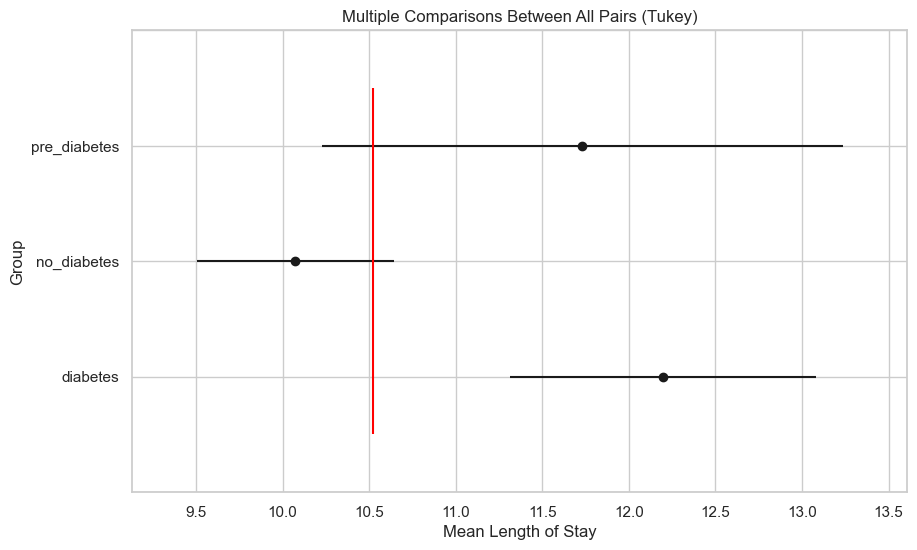



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

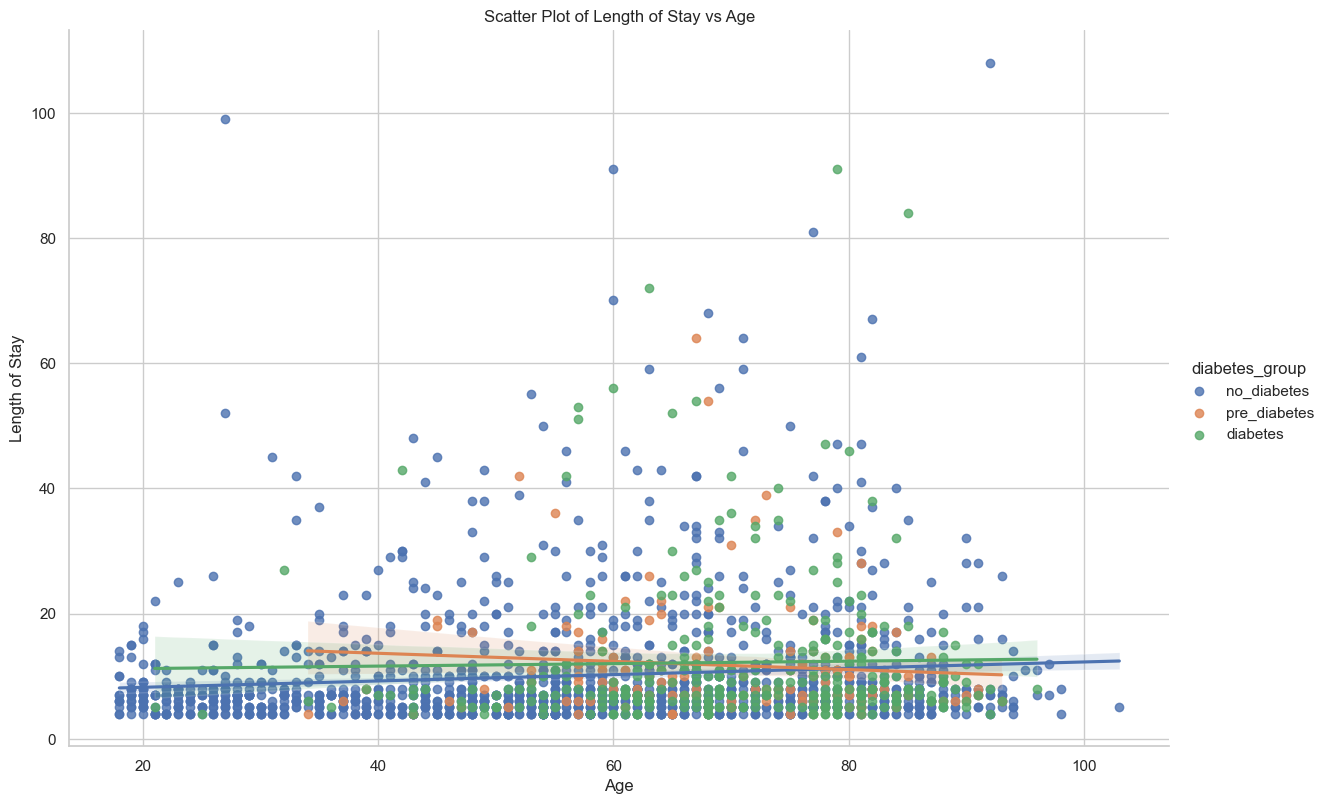



visualize_chi_square_results


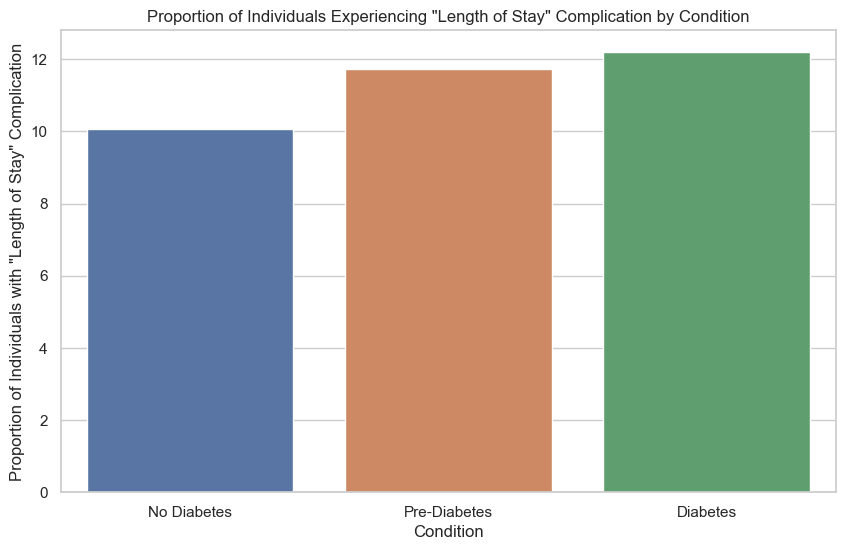



visualize_relative_risk_results


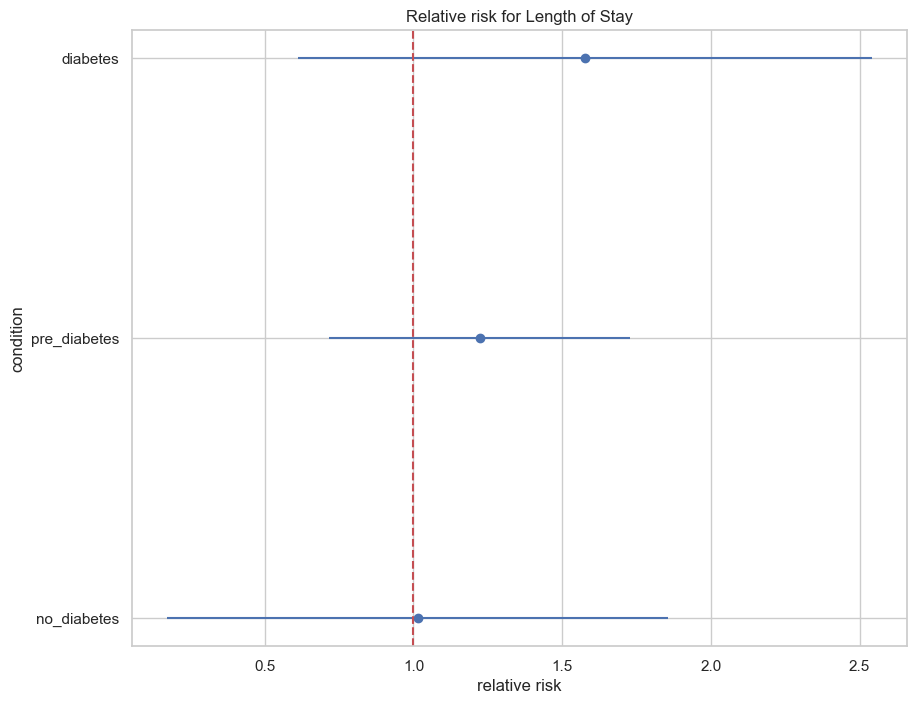



visualize_odds_ratio_results


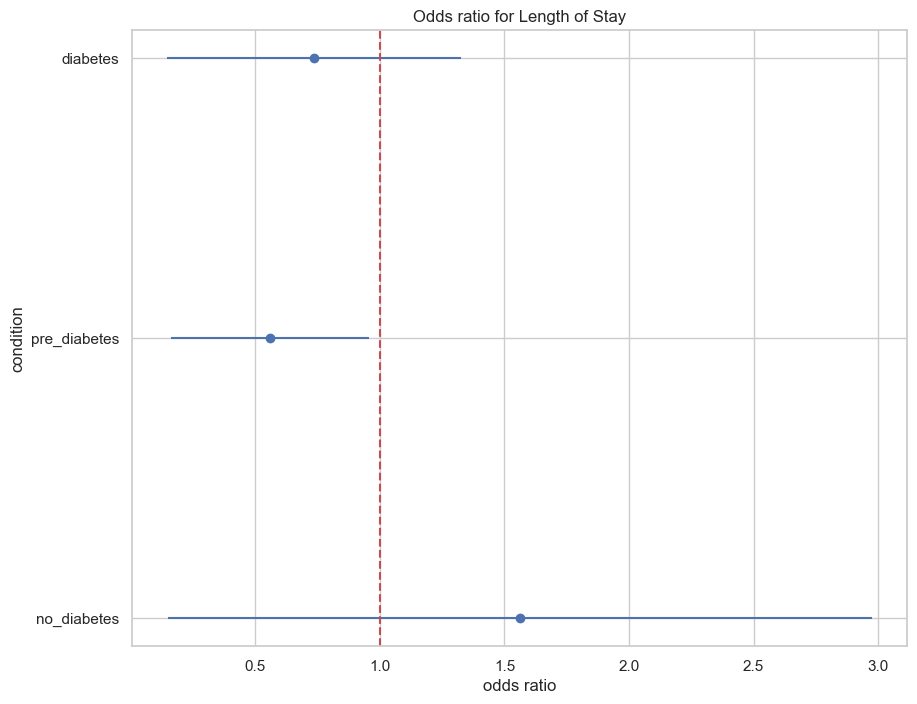



visualize_relative_risk_by_age_results


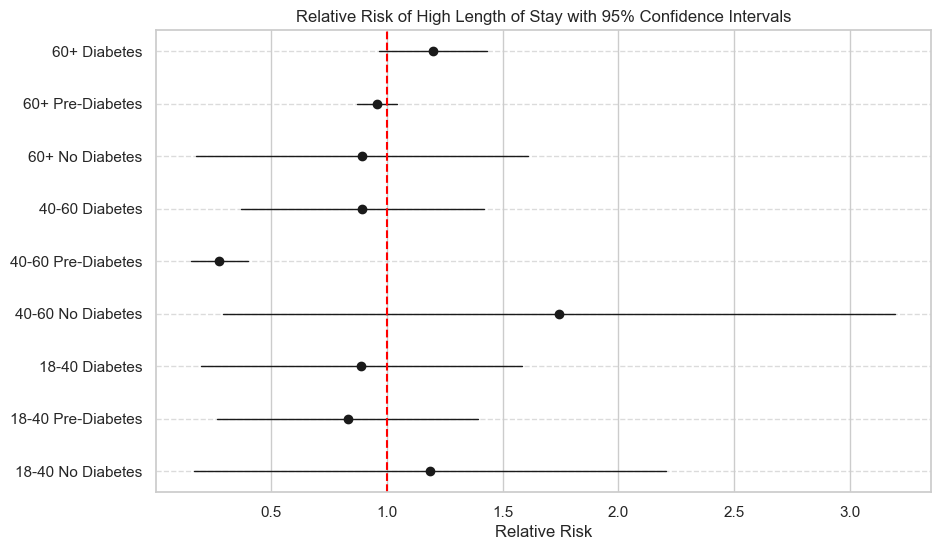



one_way_anova
(4.82574790276262, 0.008115810254152204)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes     2.022218  0.043314
diabetes vs no_diabetes         2.725927  0.006473






tukey_hsd
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
   diabetes  no_diabetes  -0.0323 0.0214 -0.0608 -0.0038   True
   diabetes pre_diabetes   0.0007 0.9993  -0.046  0.0474  False
no_diabetes pre_diabetes    0.033 0.1371 -0.0076  0.0736  False
---------------------------------------------------------------
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
   diabetes  no_diabetes  -0.0323 0.0214 -0.0608 -0.0038   True
   diabetes pre_diabetes   0.0007 0.9993  -0.046  0.0474 

<Figure size 1000x800 with 0 Axes>

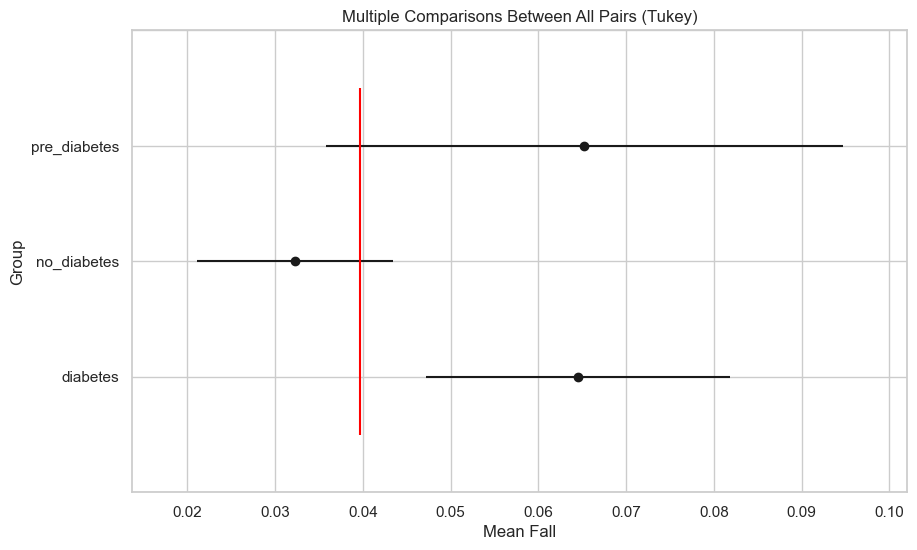



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

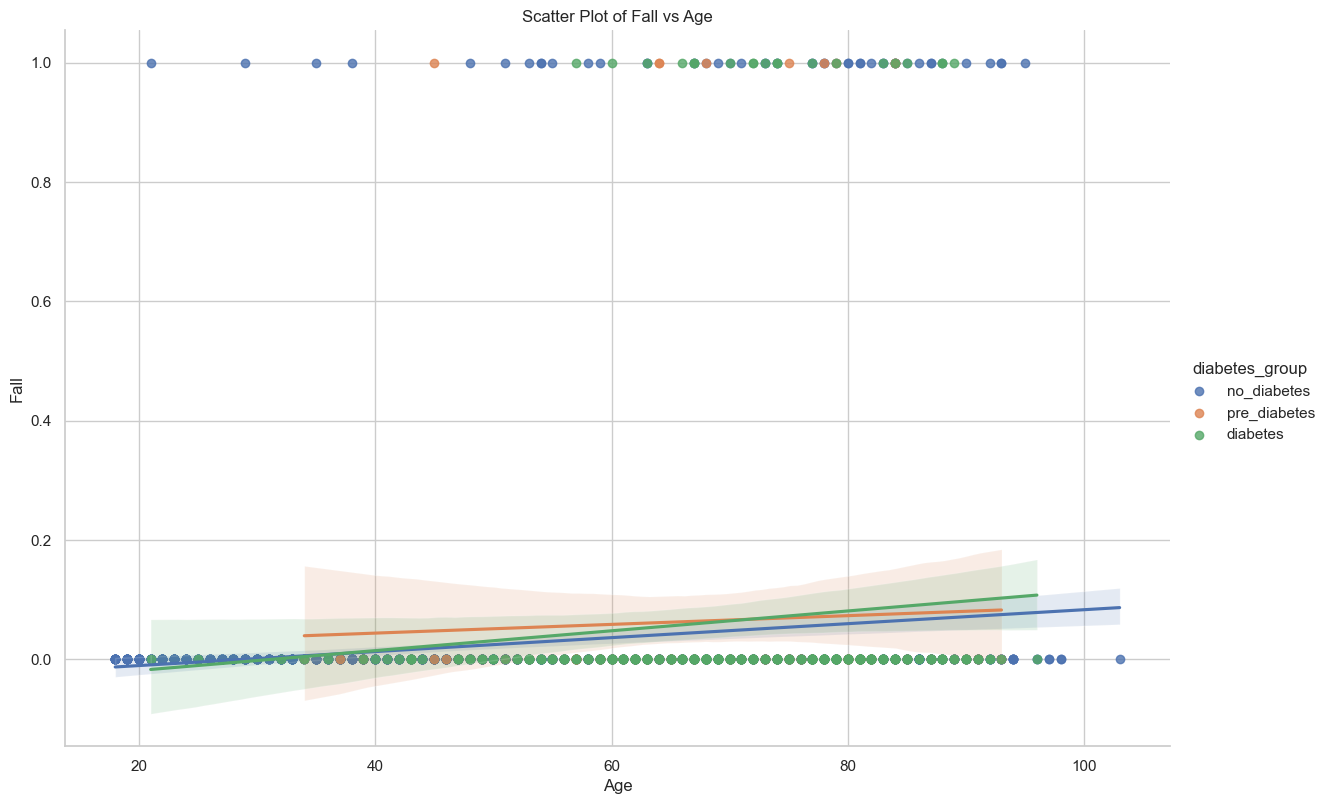



visualize_chi_square_results


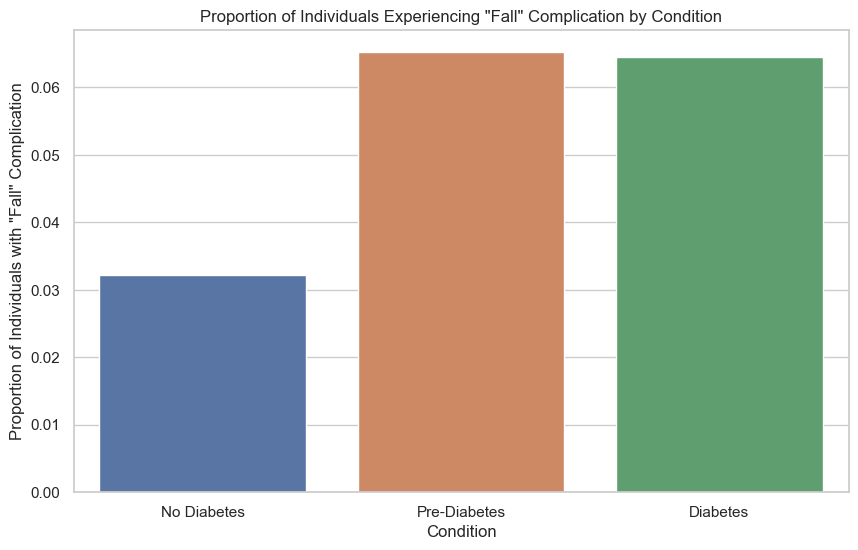



visualize_relative_risk_results


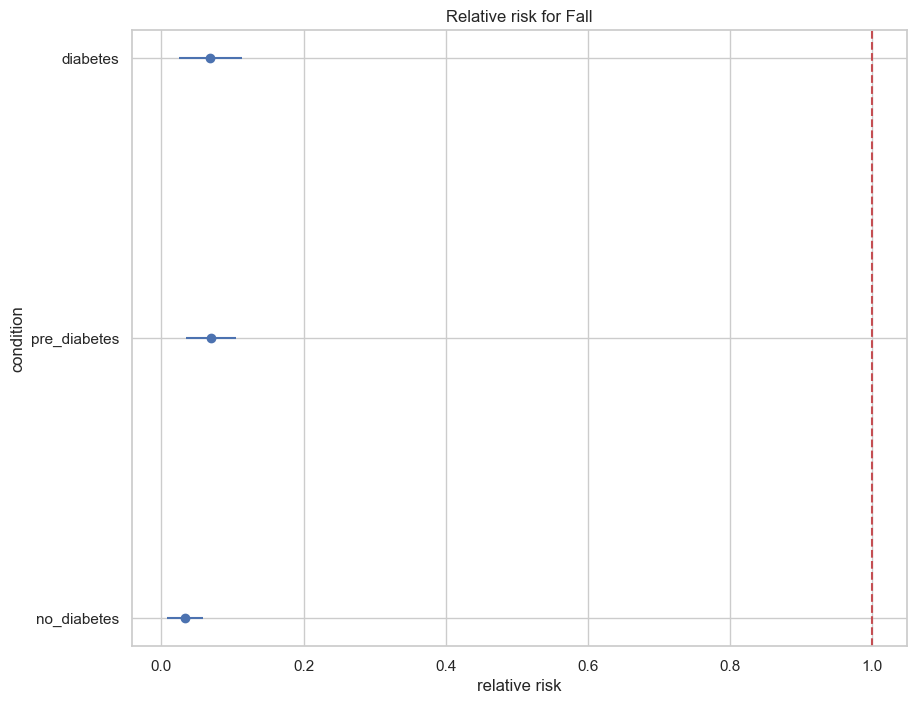



visualize_odds_ratio_results


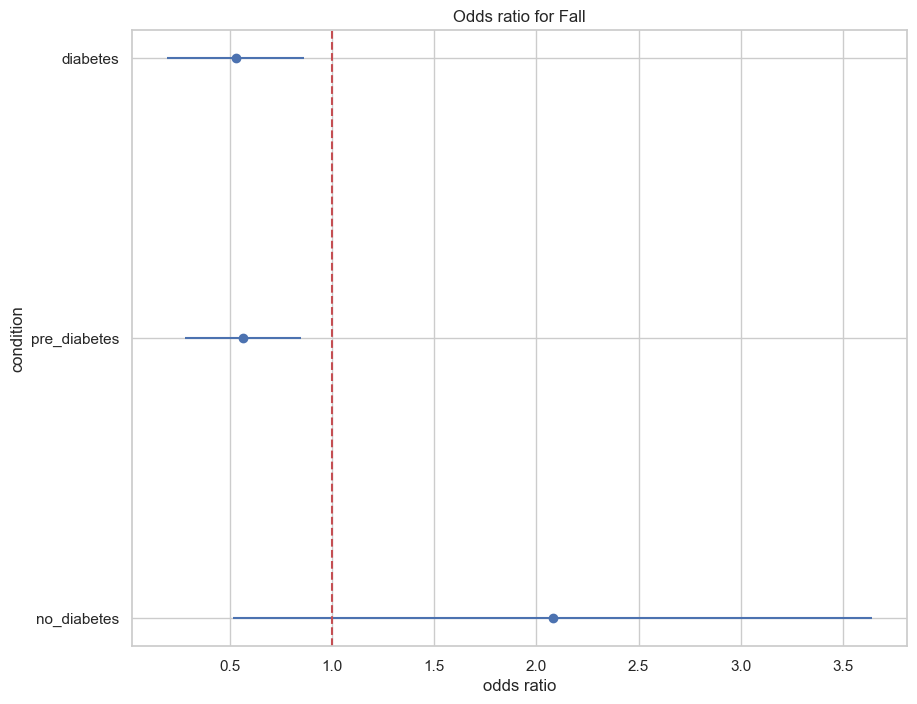



visualize_relative_risk_by_age_results


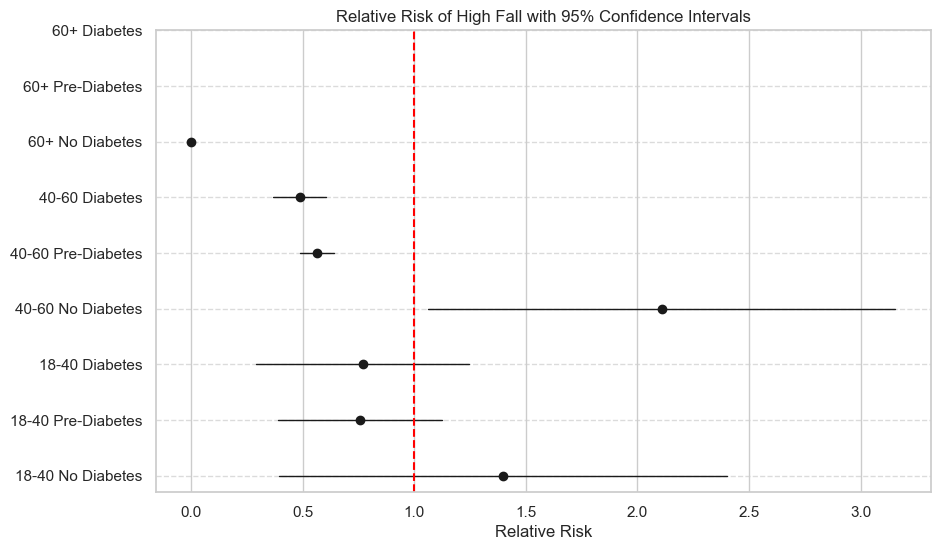



one_way_anova
(1.2641029604024447, 0.2827220948316846)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes    -1.171685  0.241492
diabetes vs no_diabetes         0.967288  0.333528






tukey_hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0063 0.5751 -0.0209 0.0084  False
   diabetes pre_diabetes  -0.0161 0.2582 -0.0402 0.0079  False
no_diabetes pre_diabetes  -0.0099 0.5104 -0.0308  0.011  False
--------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0063 0.5751 -0.0209 0.0084  False
   diabetes pre_diabetes  -0.0161 0.2582 -0.0402 0.0079  False
no_di

<Figure size 1000x800 with 0 Axes>

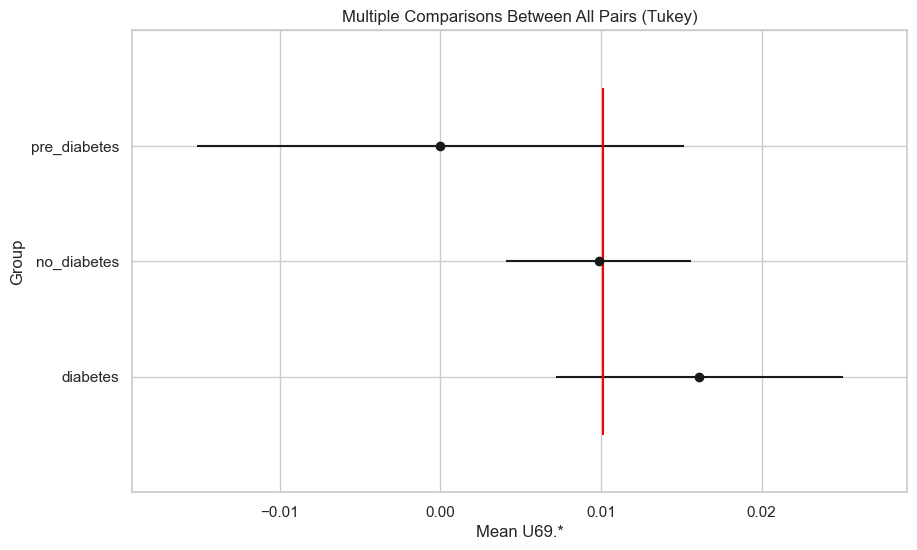



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

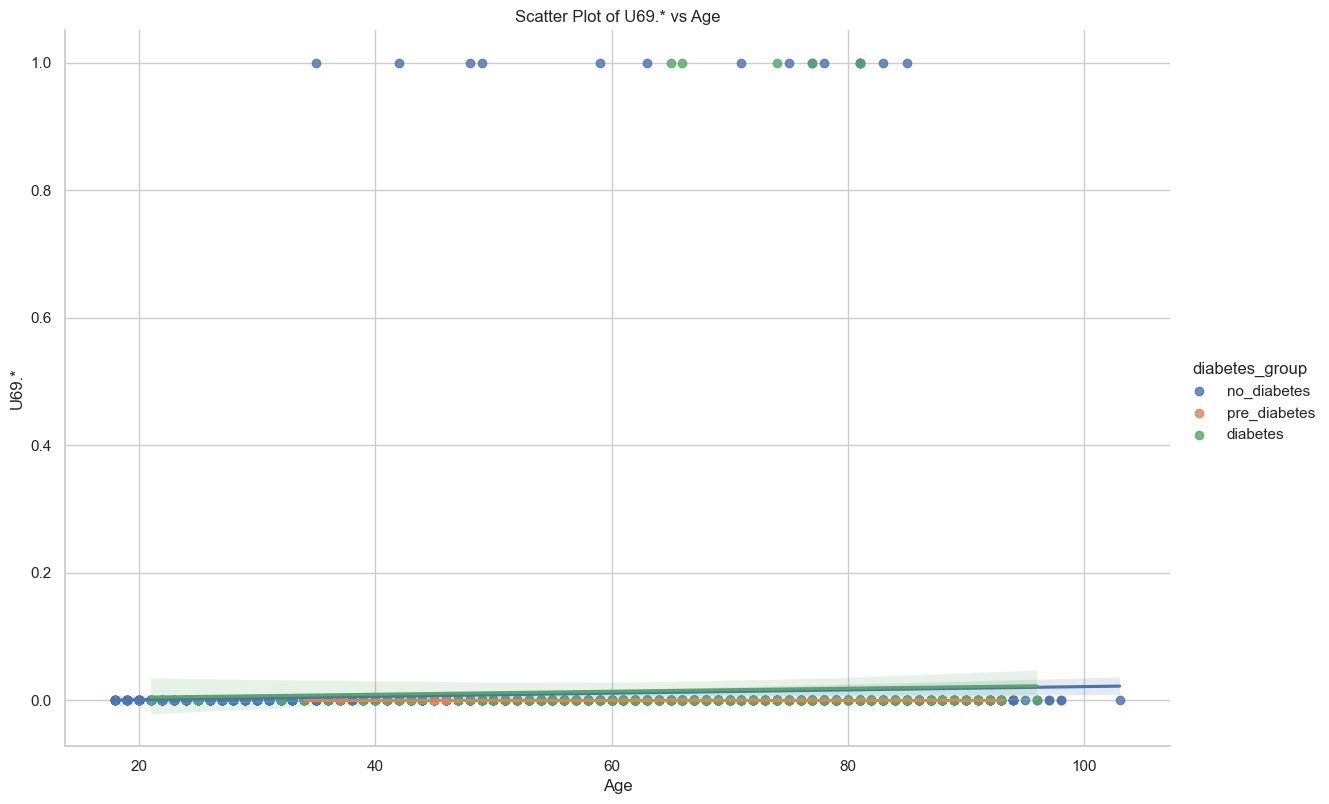



visualize_chi_square_results


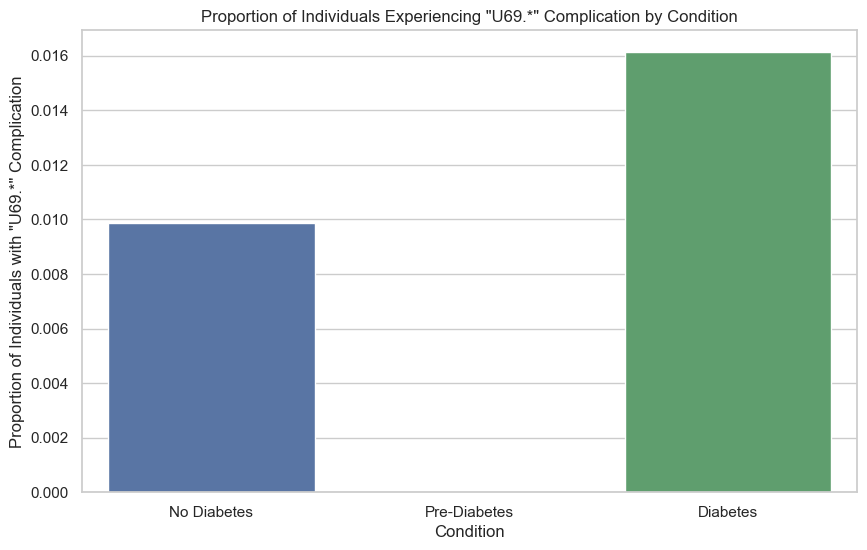



visualize_relative_risk_results


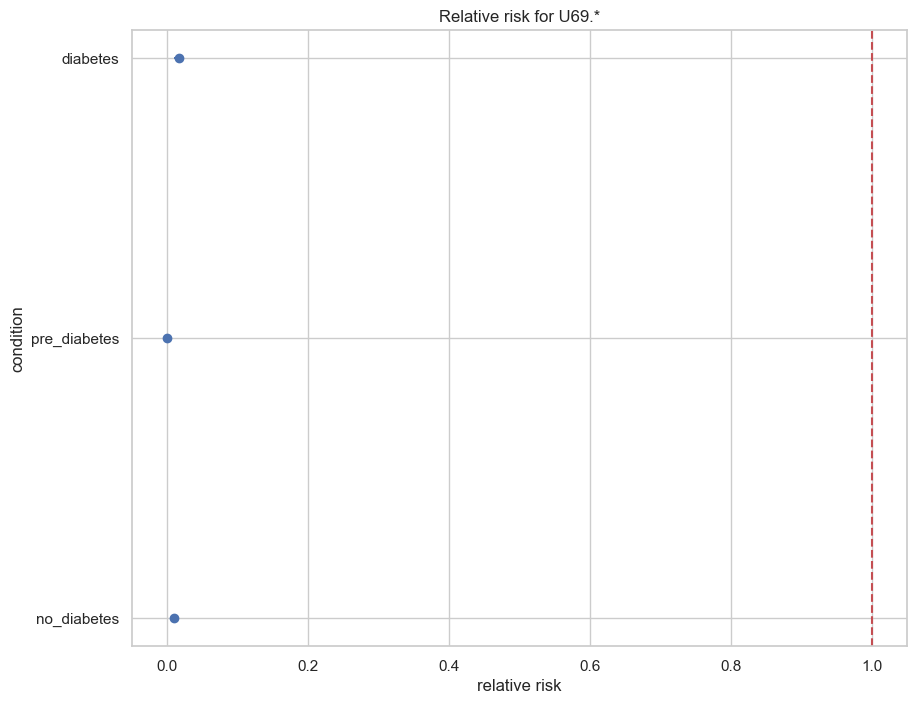



visualize_odds_ratio_results


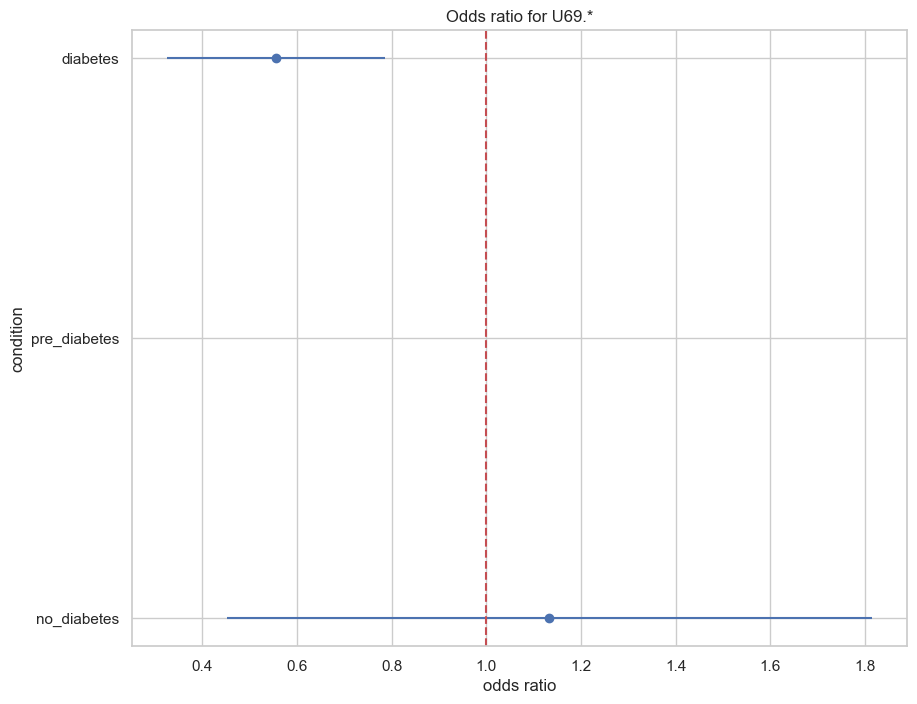



visualize_relative_risk_by_age_results


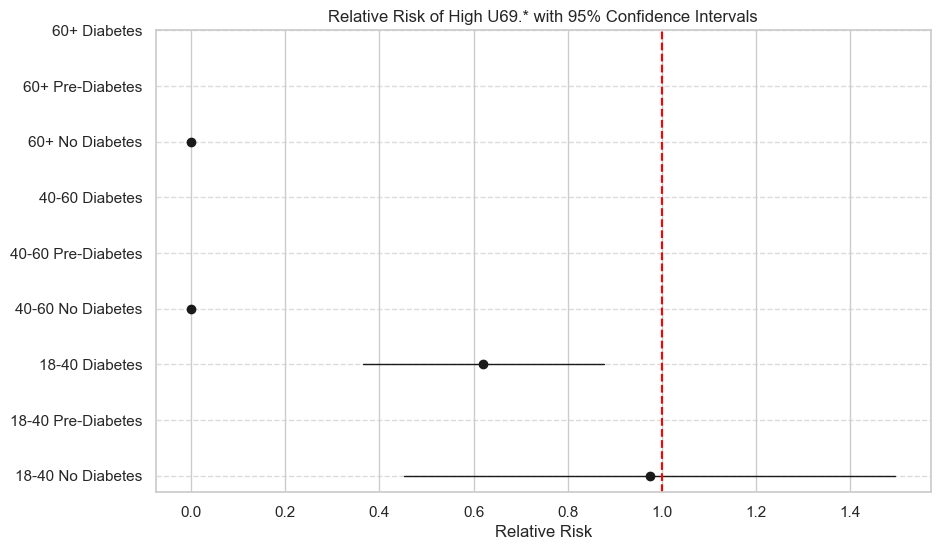



one_way_anova
(1.0900729620782101, 0.336395070684971)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes    -1.044784  0.296275
diabetes vs no_diabetes         0.923357  0.355943






tukey_hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0126  0.617 -0.0443  0.019  False
   diabetes pre_diabetes  -0.0323 0.3114 -0.0843 0.0197  False
no_diabetes pre_diabetes  -0.0197 0.5631 -0.0648 0.0255  False
--------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0126  0.617 -0.0443  0.019  False
   diabetes pre_diabetes  -0.0323 0.3114 -0.0843 0.0197  False
no_dia

<Figure size 1000x800 with 0 Axes>

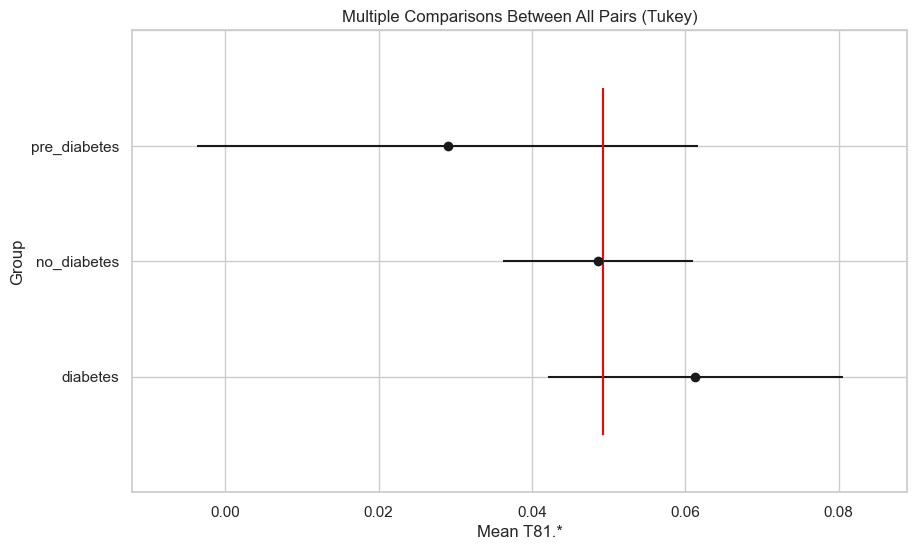



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

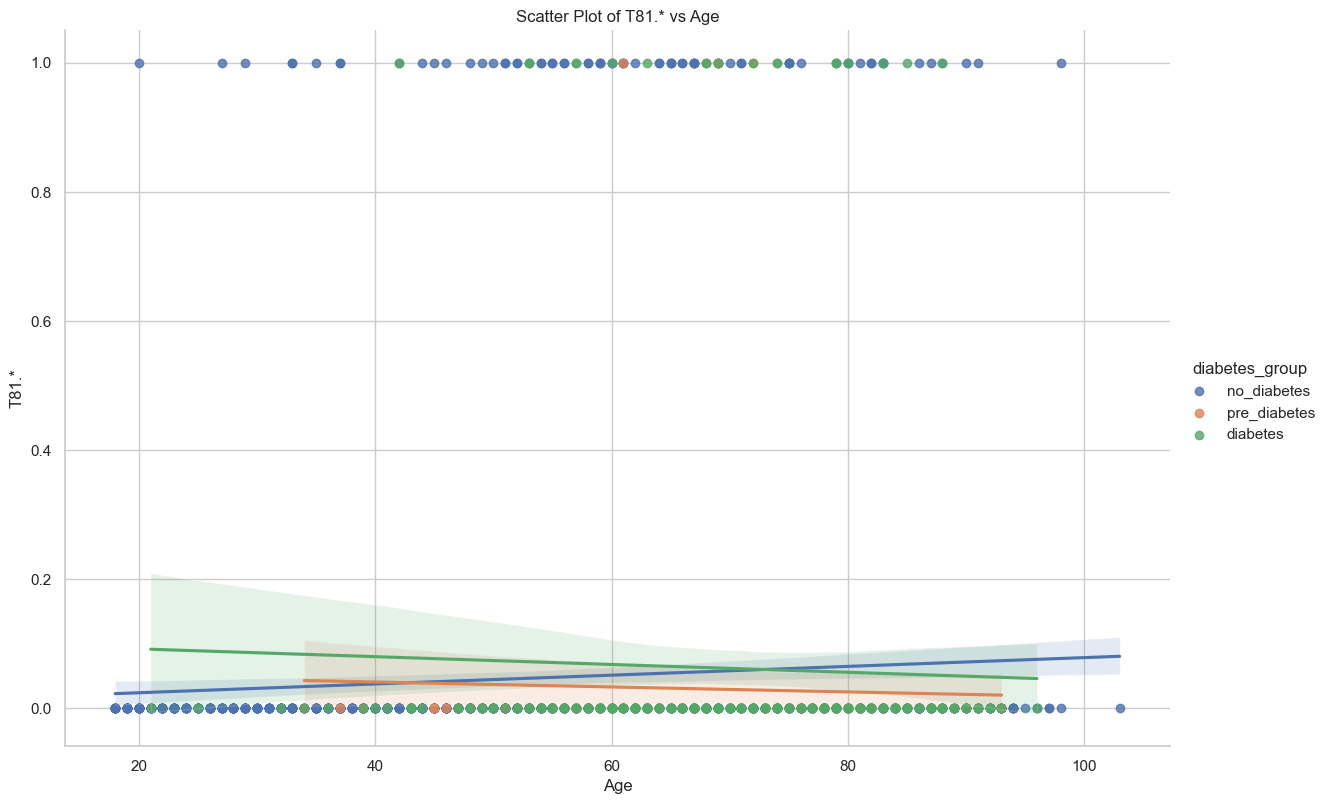



visualize_chi_square_results


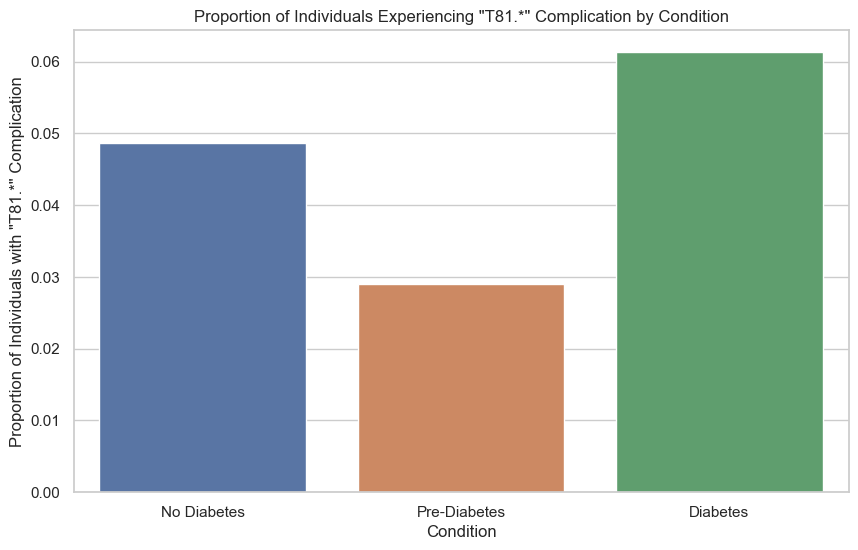



visualize_relative_risk_results


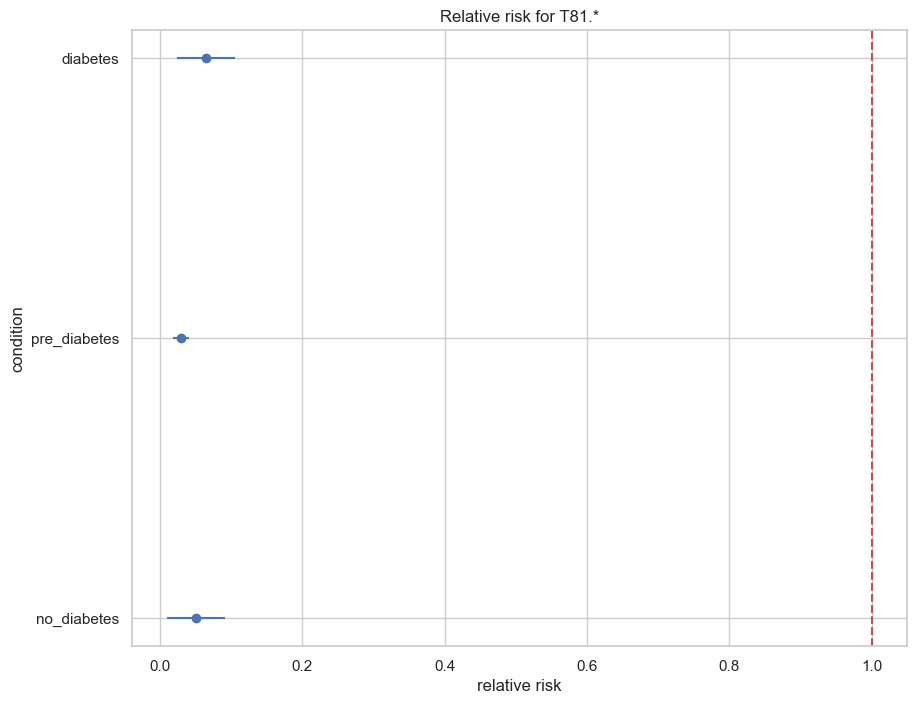



visualize_odds_ratio_results


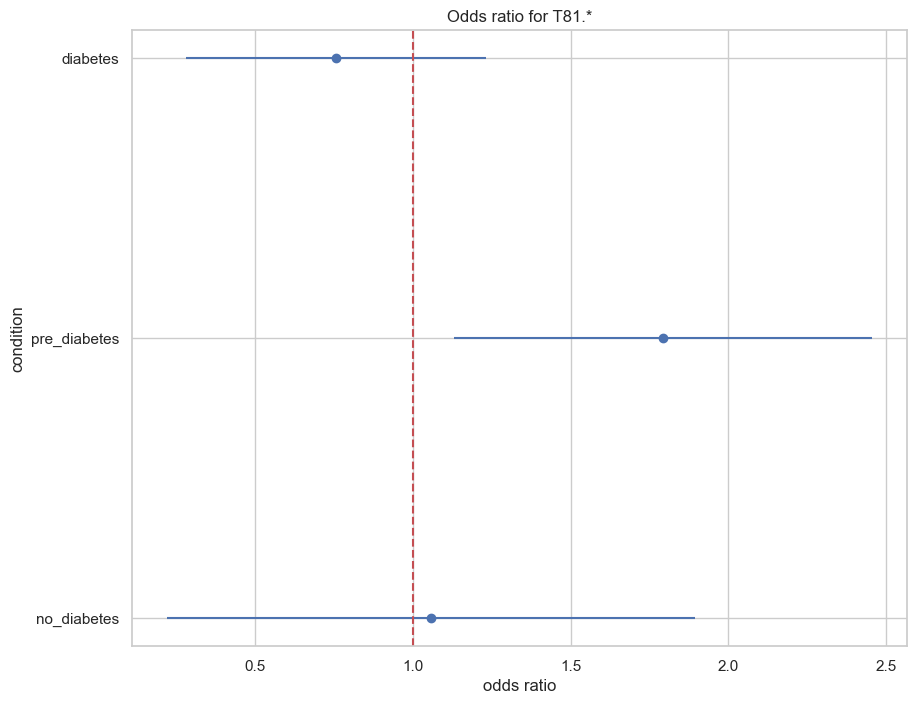



visualize_relative_risk_by_age_results


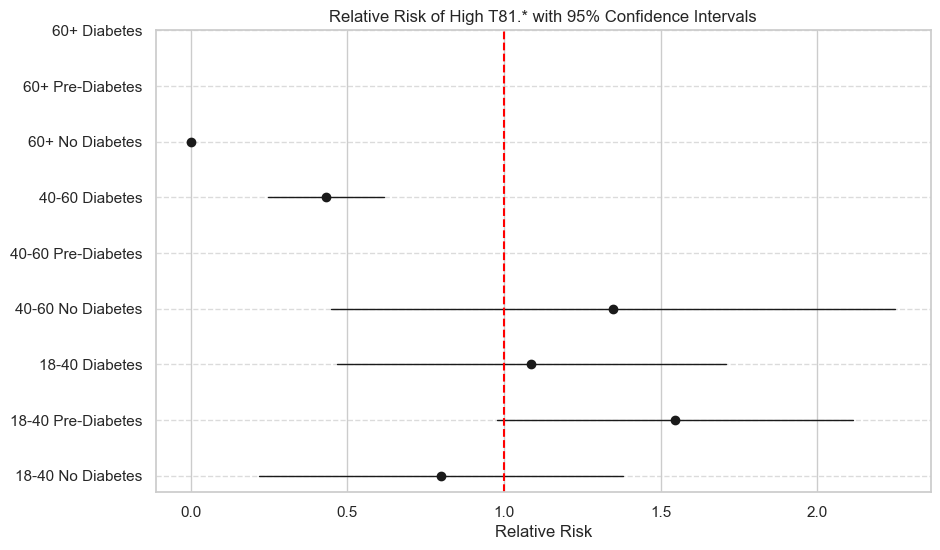



one_way_anova
(2.6423095847201137, 0.07144947915880548)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes    -2.274008  0.023093
diabetes vs no_diabetes         0.217763  0.827638






tukey_hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0025 0.9723  -0.029 0.0239  False
   diabetes pre_diabetes  -0.0387 0.0926 -0.0822 0.0048  False
no_diabetes pre_diabetes  -0.0362 0.0641 -0.0739 0.0016  False
--------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0025 0.9723  -0.029 0.0239  False
   diabetes pre_diabetes  -0.0387 0.0926 -0.0822 0.0048  False
no_d

<Figure size 1000x800 with 0 Axes>

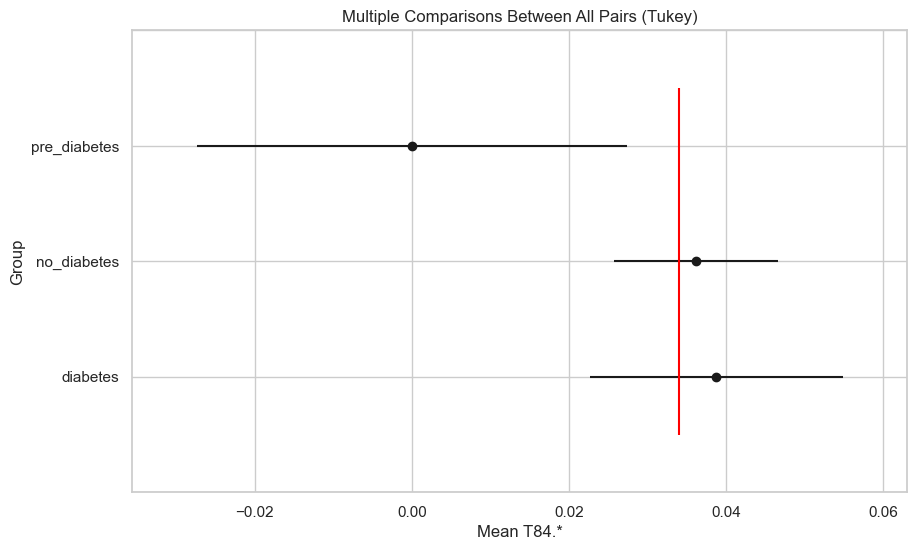



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

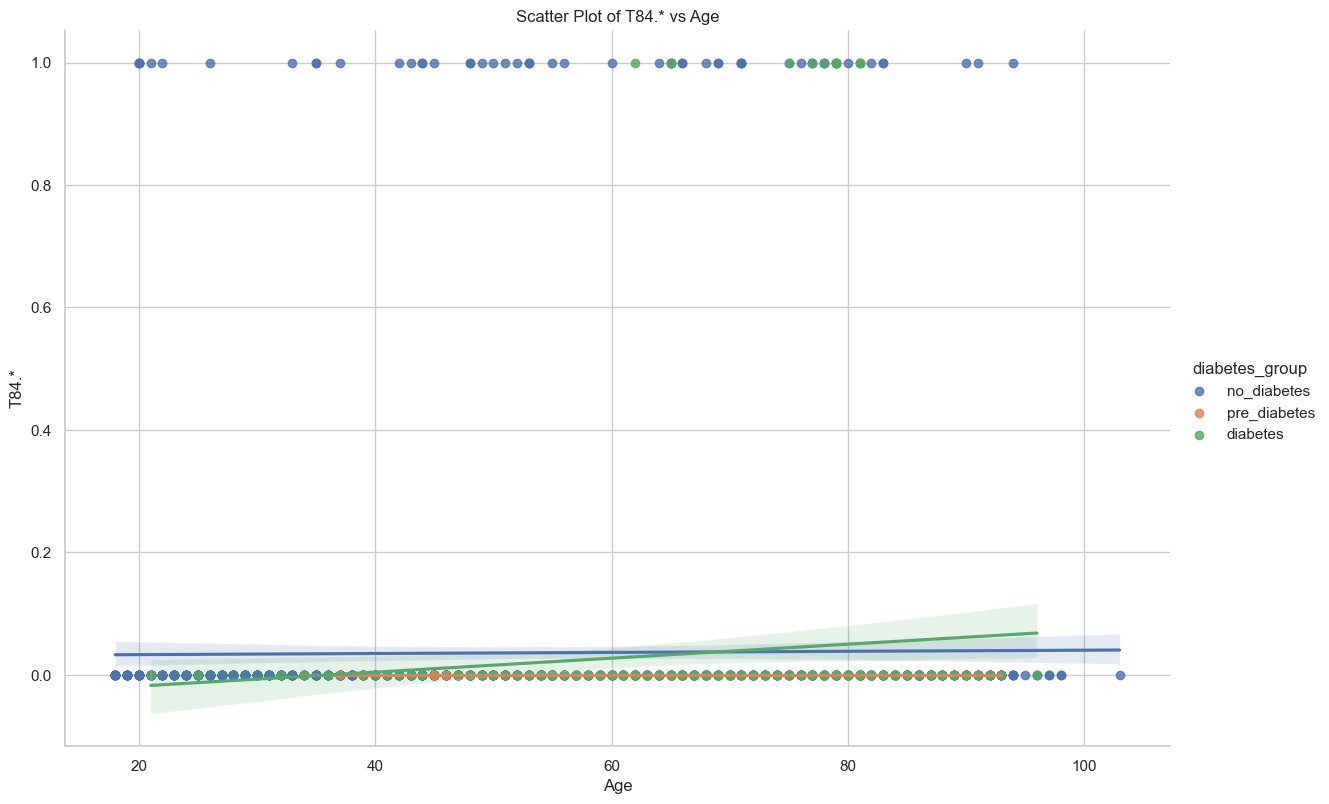



visualize_chi_square_results


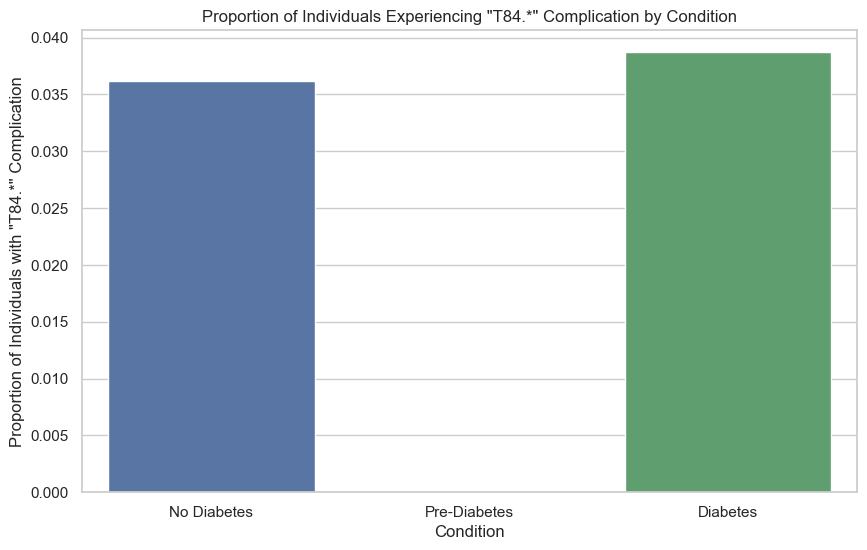



visualize_relative_risk_results


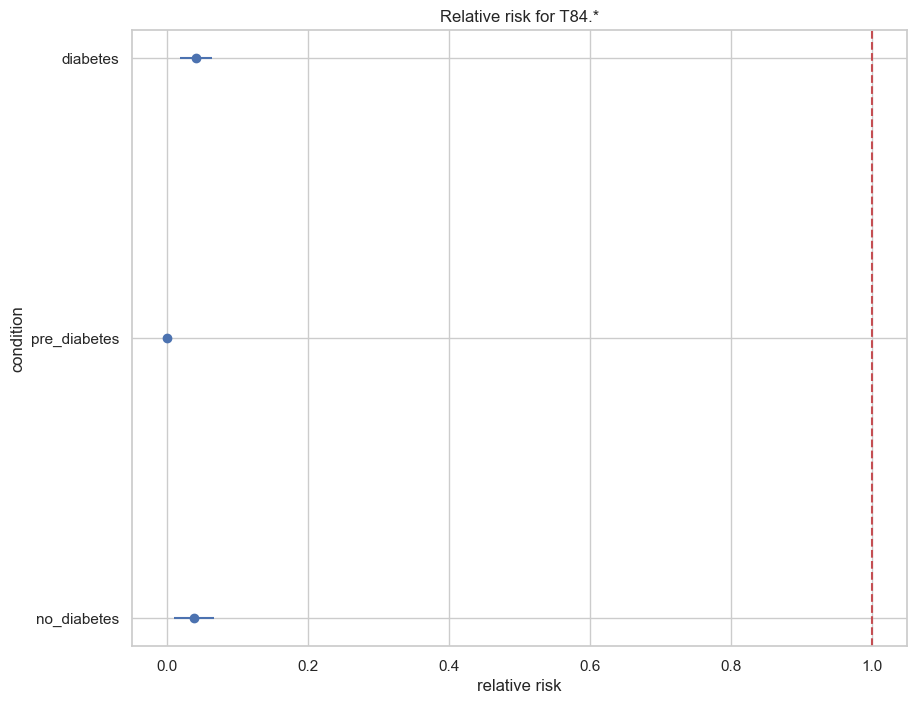



visualize_odds_ratio_results


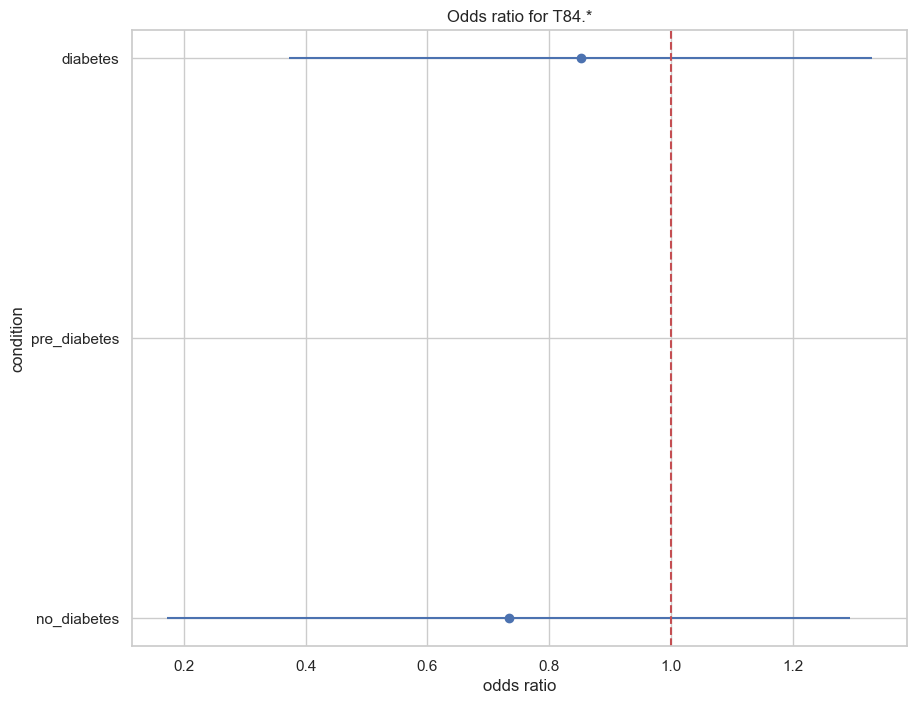



visualize_relative_risk_by_age_results


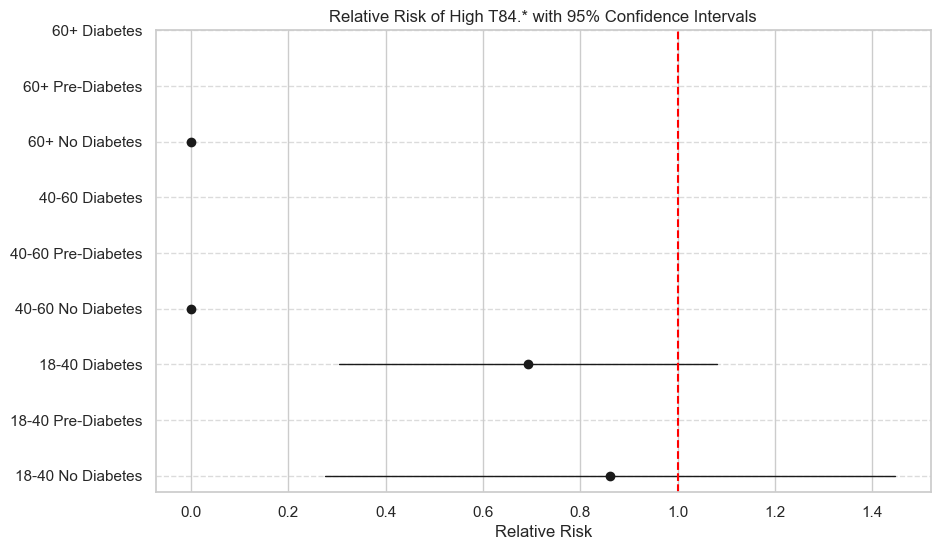



one_way_anova
(3.46342327748778, 0.031513596310710636)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes     1.756018  0.079270
diabetes vs no_diabetes         2.311373  0.020923






tukey_hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0197 0.0643 -0.0403 0.0009  False
   diabetes pre_diabetes   0.0007 0.9985 -0.0331 0.0346  False
no_diabetes pre_diabetes   0.0205 0.2322 -0.0089 0.0498  False
--------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0197 0.0643 -0.0403 0.0009  False
   diabetes pre_diabetes   0.0007 0.9985 -0.0331 0.0346  False
no_di

<Figure size 1000x800 with 0 Axes>

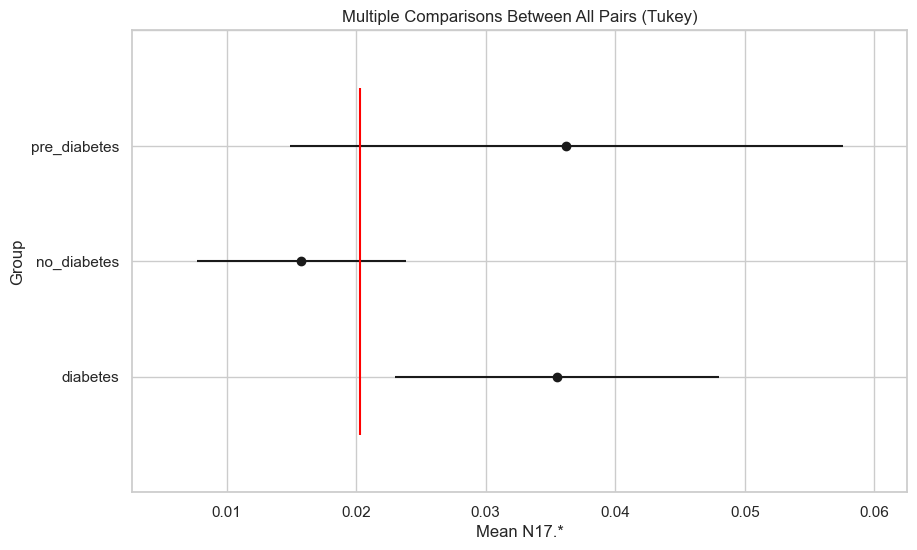



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

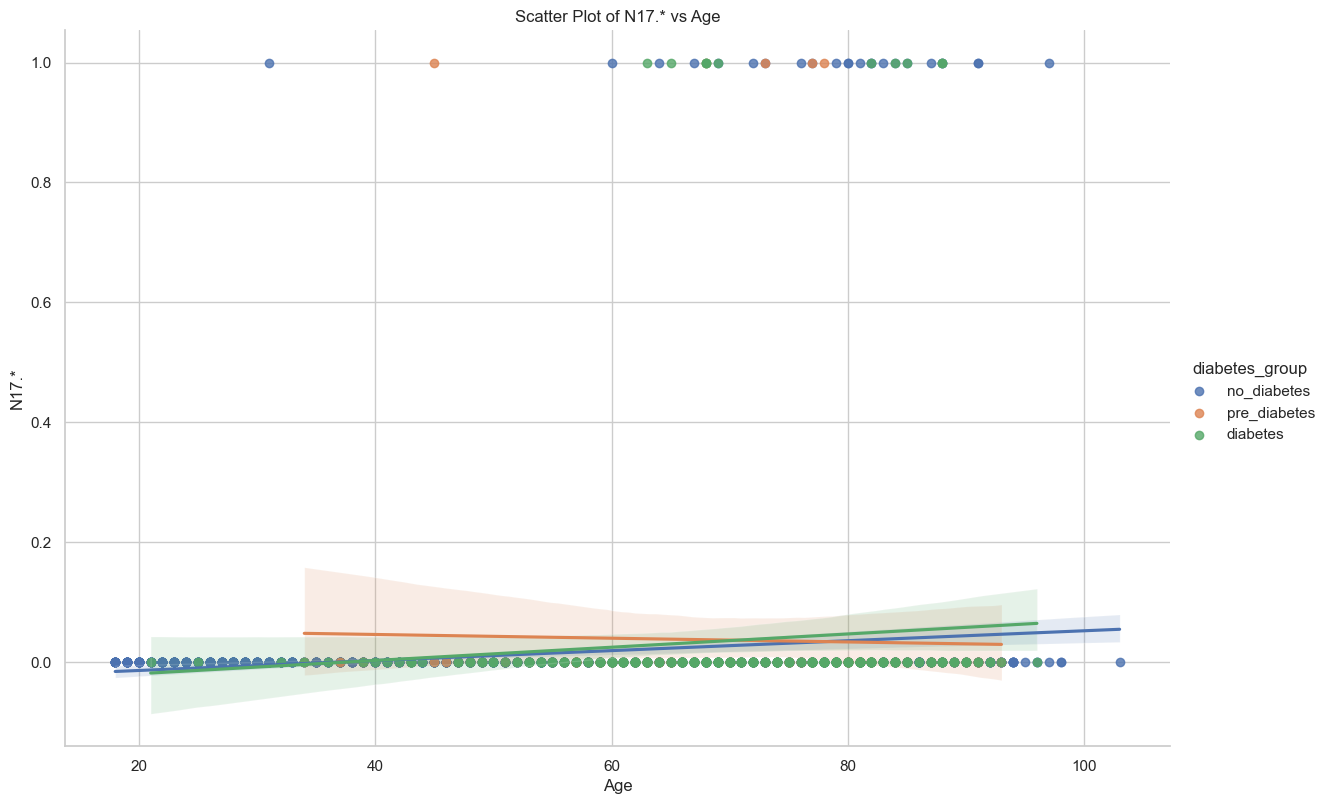



visualize_chi_square_results


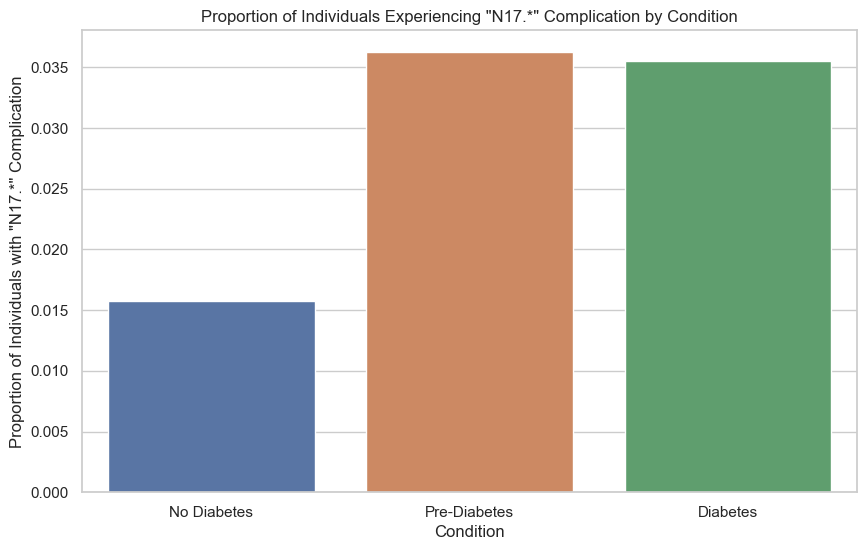



visualize_relative_risk_results


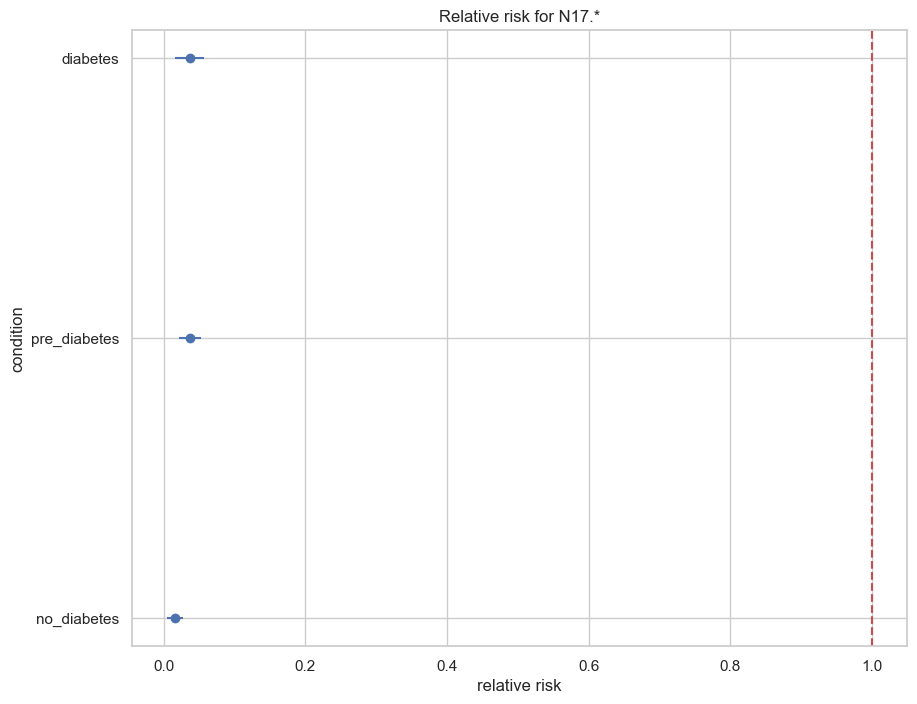



visualize_odds_ratio_results


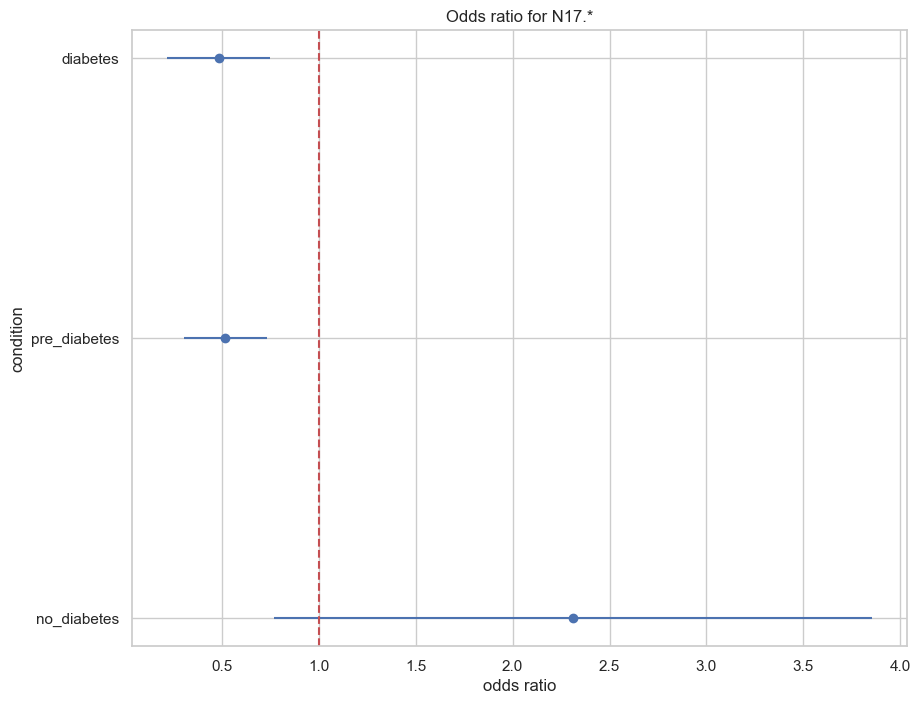



visualize_relative_risk_by_age_results


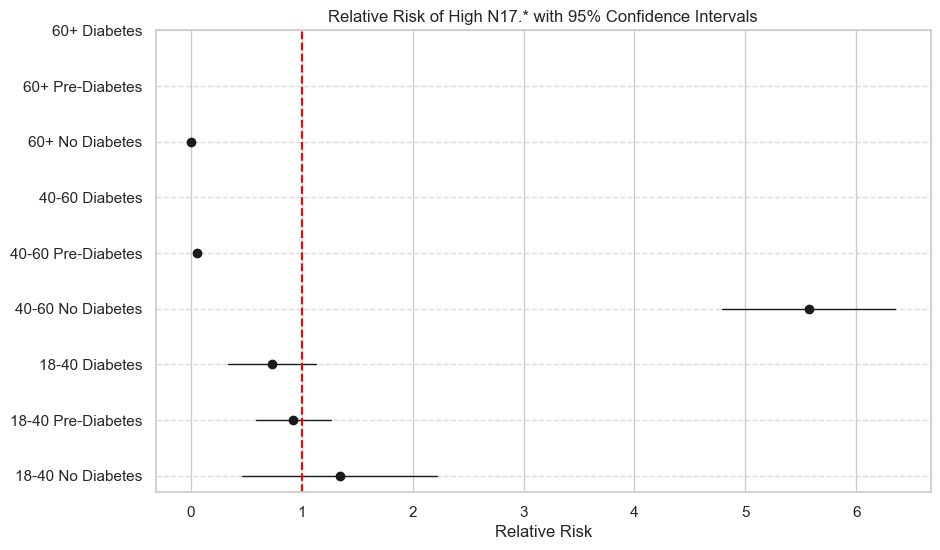



one_way_anova
(1.7575940709061484, 0.1727301617005915)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes     1.784491  0.074527
diabetes vs no_diabetes         1.009346  0.312942






tukey_hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0057 0.6046 -0.0196 0.0082  False
   diabetes pre_diabetes   0.0088 0.6357  -0.014 0.0317  False
no_diabetes pre_diabetes   0.0145 0.1999 -0.0053 0.0344  False
--------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0057 0.6046 -0.0196 0.0082  False
   diabetes pre_diabetes   0.0088 0.6357  -0.014 0.0317  False
no_di

<Figure size 1000x800 with 0 Axes>

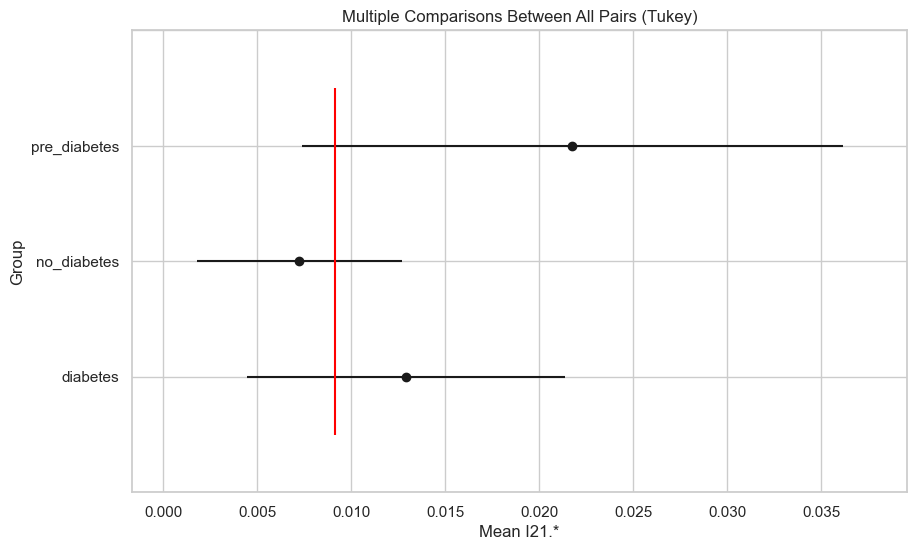



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

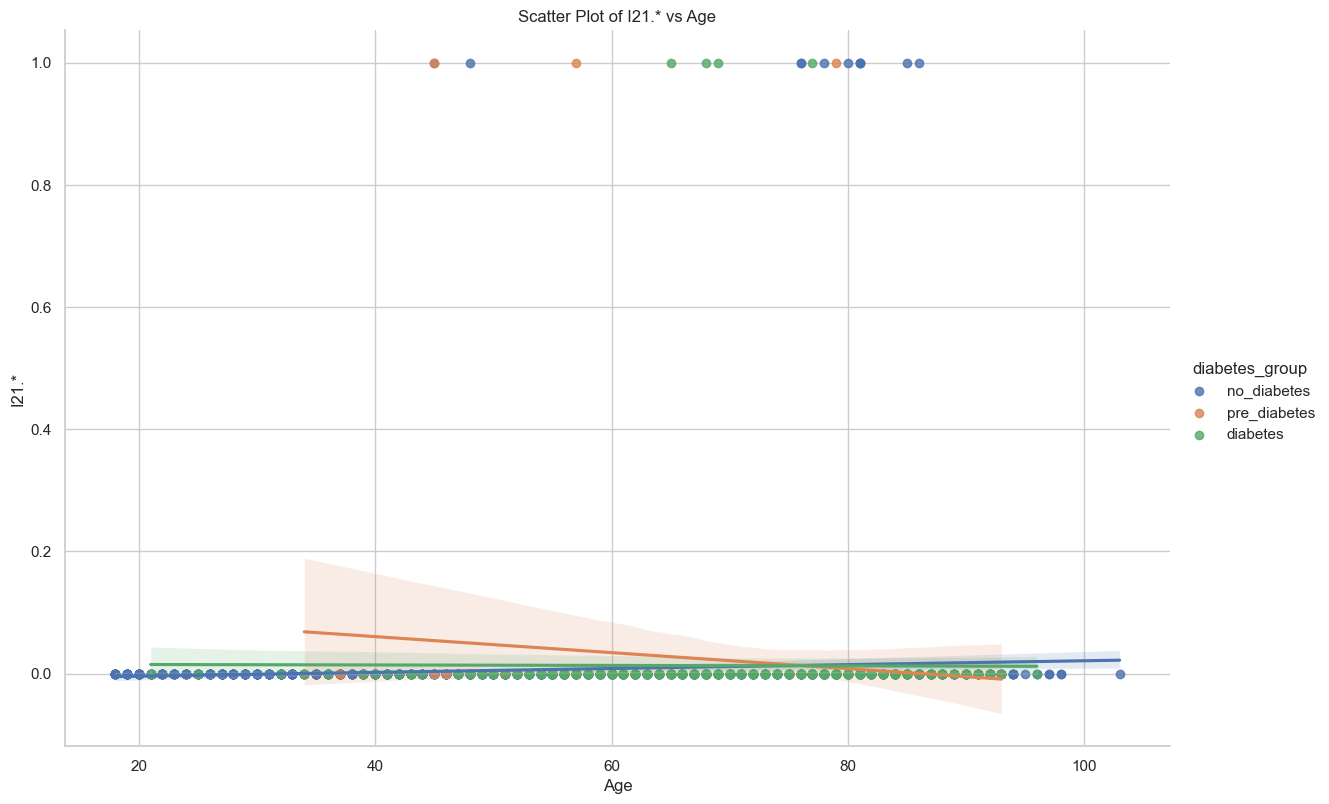



visualize_chi_square_results


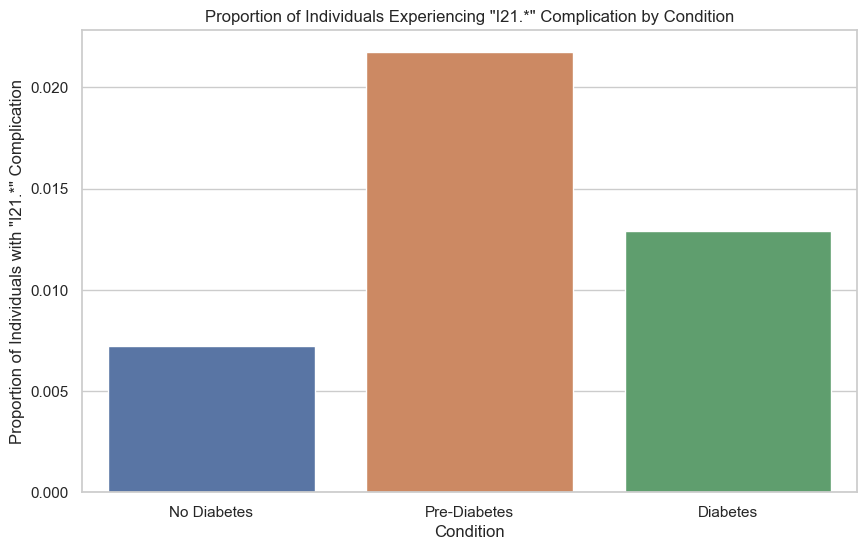



visualize_relative_risk_results


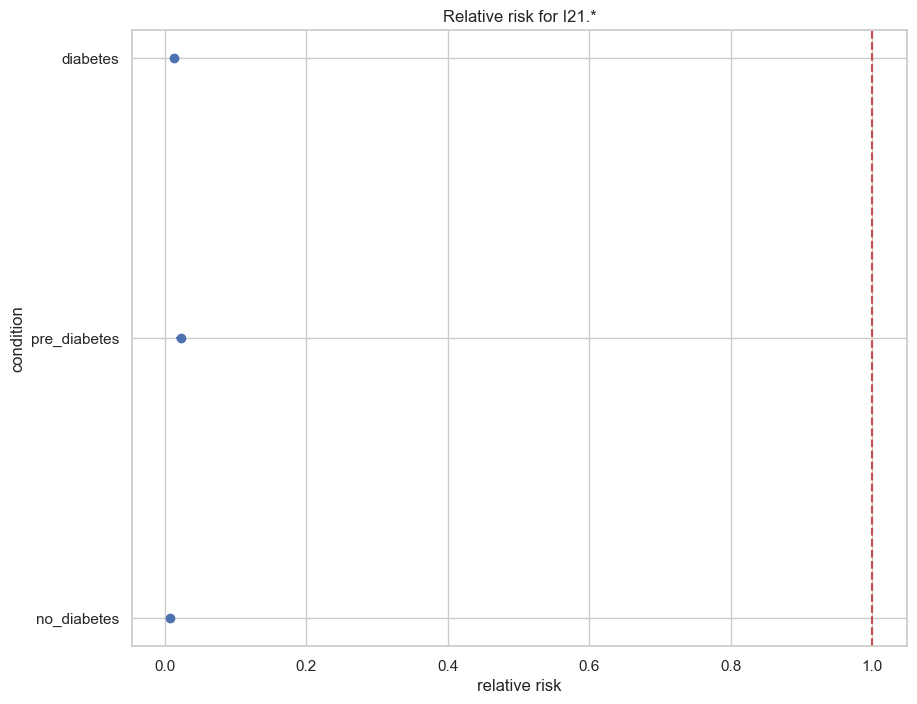



visualize_odds_ratio_results


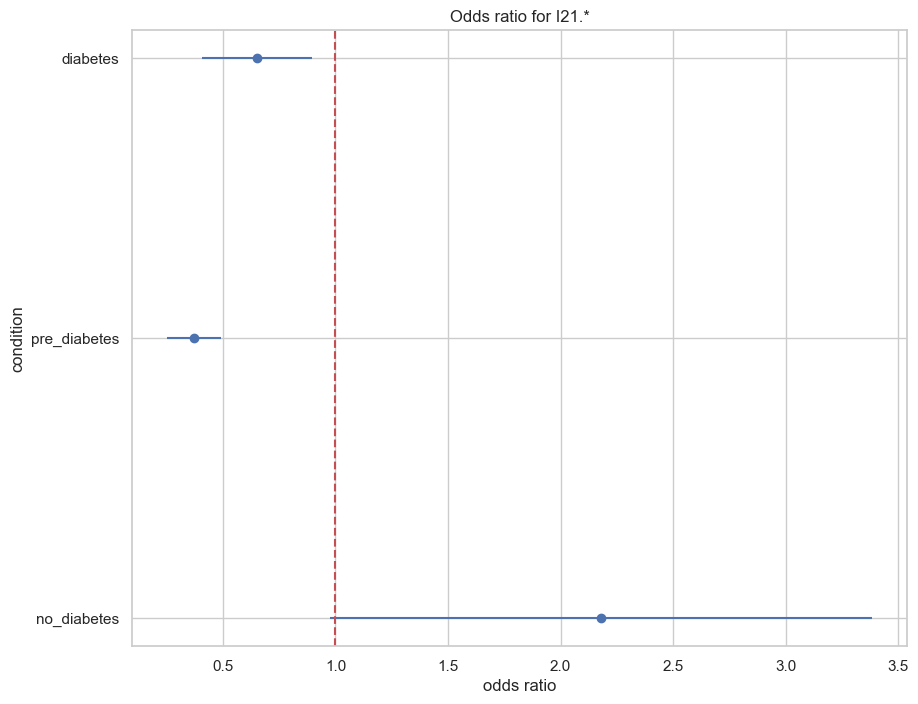



visualize_relative_risk_by_age_results


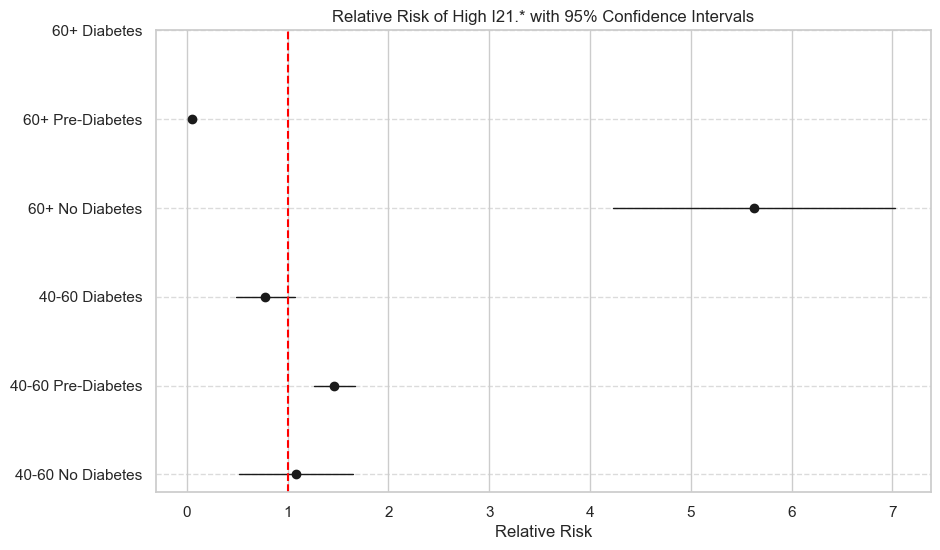



one_way_anova
(0.8980365004751797, 0.40753578189714934)






t_test
                             t_statistic   p_value
pre_diabetes vs no_diabetes     1.185860  0.235848
diabetes vs no_diabetes         0.845129  0.398149






tukey_hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0056 0.6906 -0.0217 0.0104  False
   diabetes pre_diabetes   0.0056 0.8716 -0.0207  0.032  False
no_diabetes pre_diabetes   0.0112 0.4836 -0.0117 0.0341  False
--------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.0056 0.6906 -0.0217 0.0104  False
   diabetes pre_diabetes   0.0056 0.8716 -0.0207  0.032  False
no_d

<Figure size 1000x800 with 0 Axes>

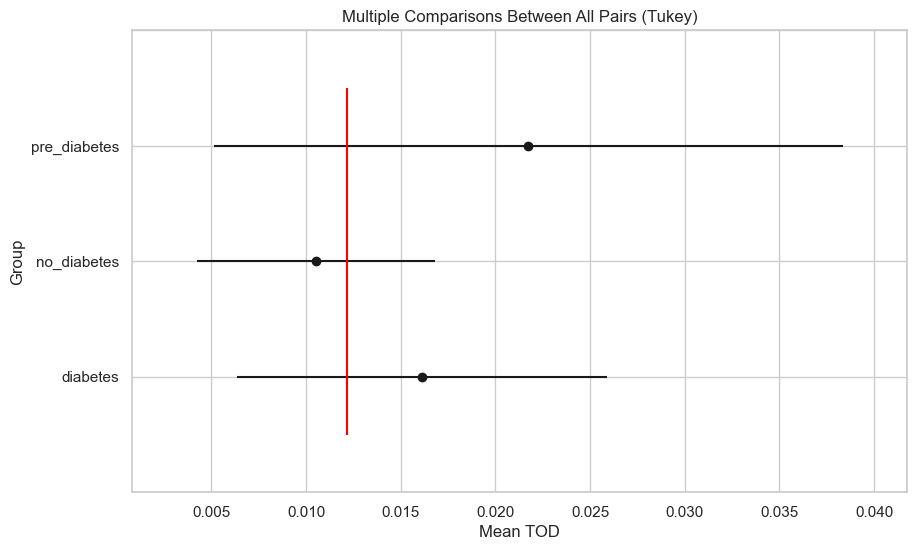



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

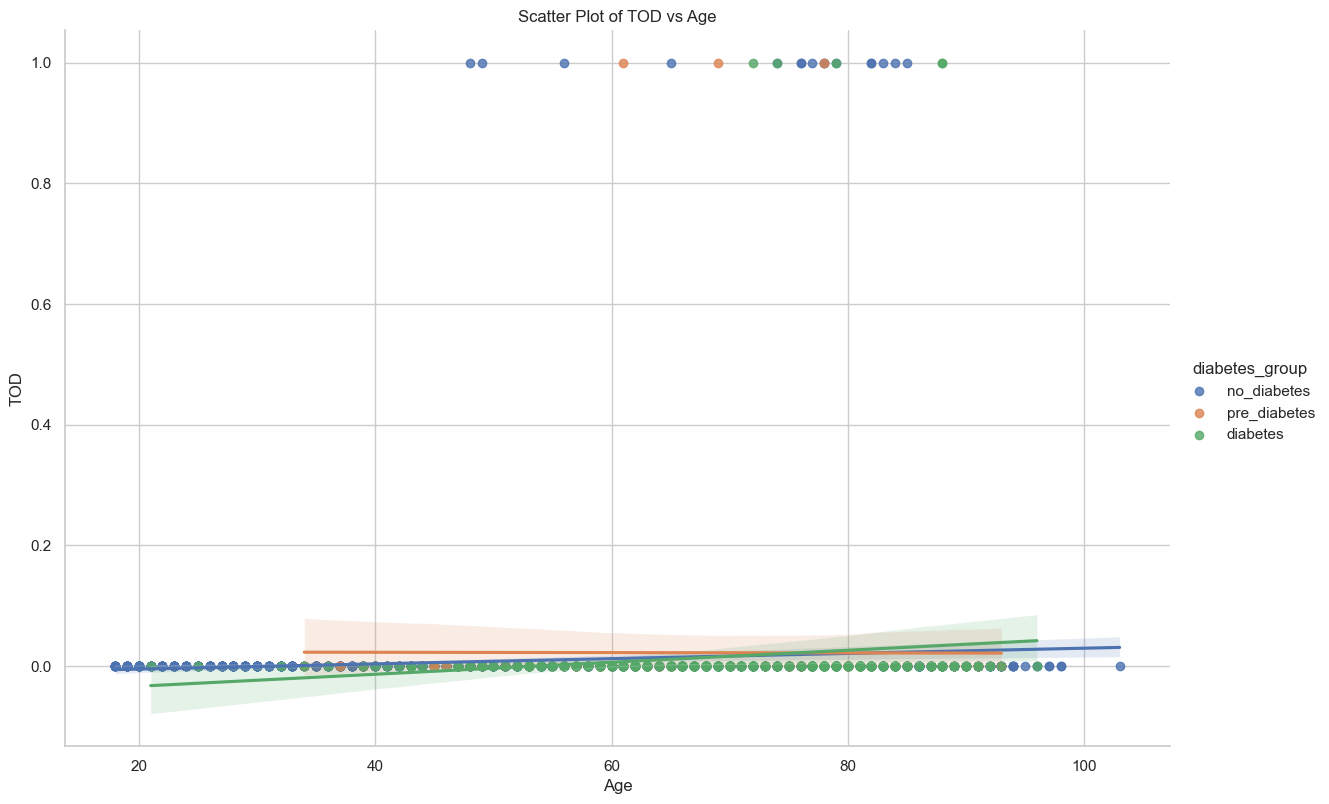



visualize_chi_square_results


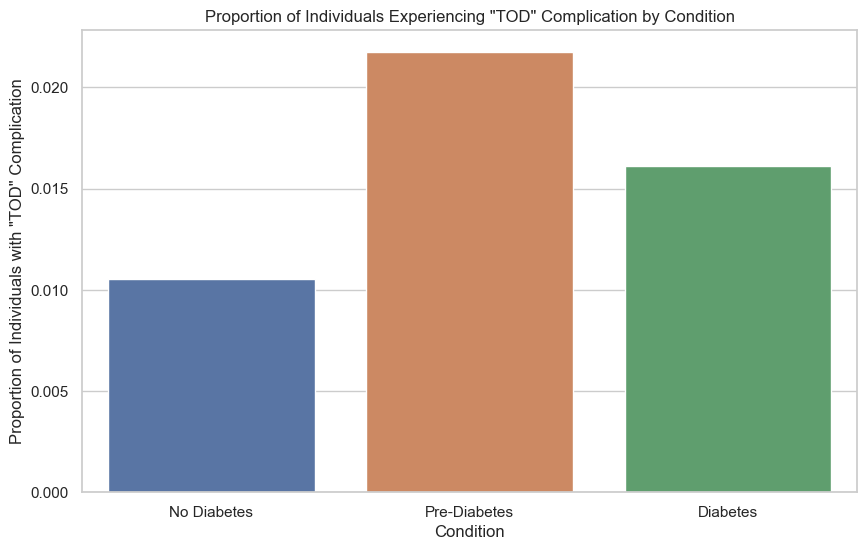



visualize_relative_risk_results


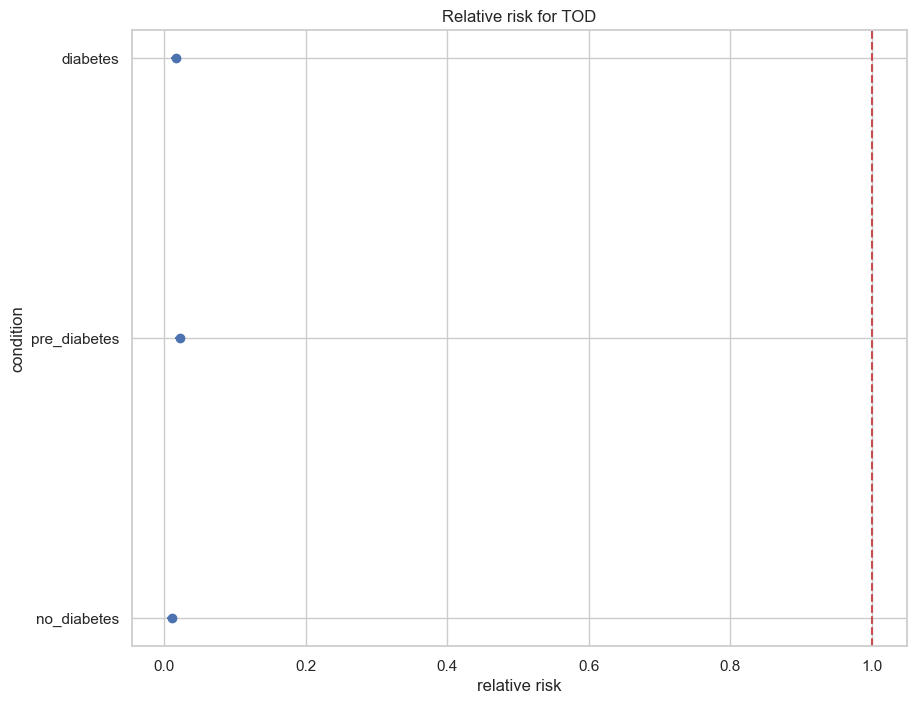



visualize_odds_ratio_results


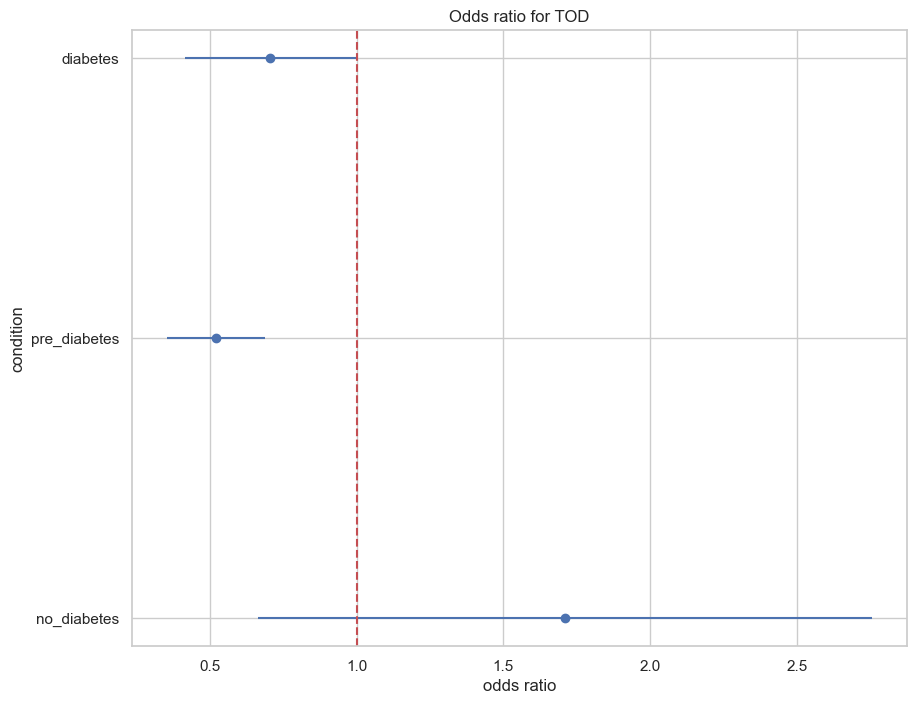



visualize_relative_risk_by_age_results


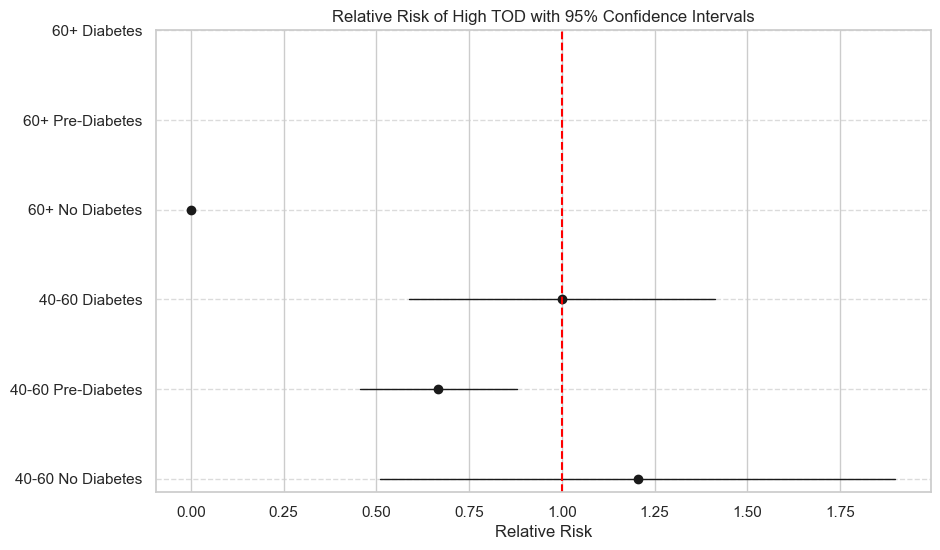



one_way_anova
(86.5721391611755, 9.259718233695341e-37)






t_test
                             t_statistic       p_value
pre_diabetes vs no_diabetes    12.757937  1.258457e-35
diabetes vs no_diabetes         6.245474  5.241195e-10






tukey_hsd
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj  lower   upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.1505   0.0 -0.2082 -0.0928   True
   diabetes pre_diabetes   0.2813   0.0  0.1865  0.3761   True
no_diabetes pre_diabetes   0.4318   0.0  0.3494  0.5142   True
--------------------------------------------------------------
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj  lower   upper  reject
--------------------------------------------------------------
   diabetes  no_diabetes  -0.1505   0.0 -0.2082 -0.0928   True
   diabetes pre_diabetes   0.2813   0.0  0.1865  0.3761

<Figure size 1000x800 with 0 Axes>

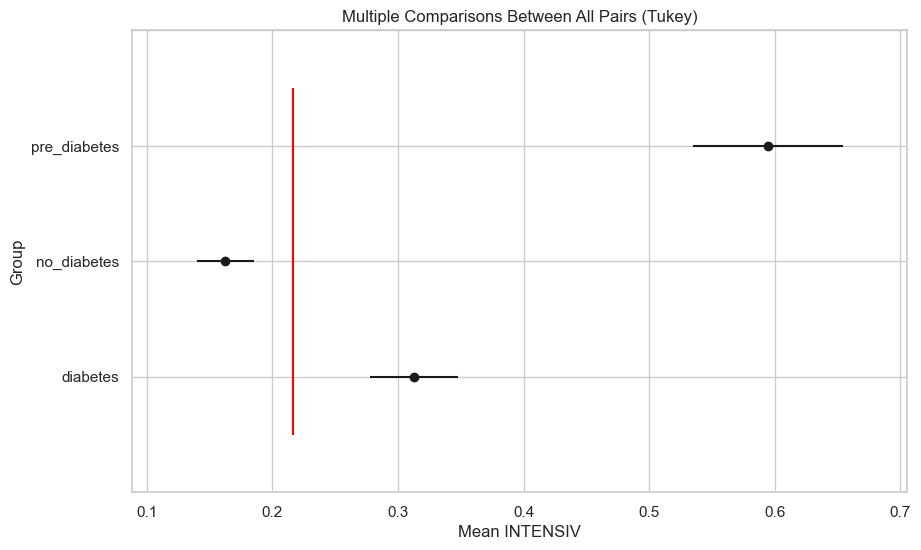



plot_interaction_analysis


<Figure size 1000x800 with 0 Axes>

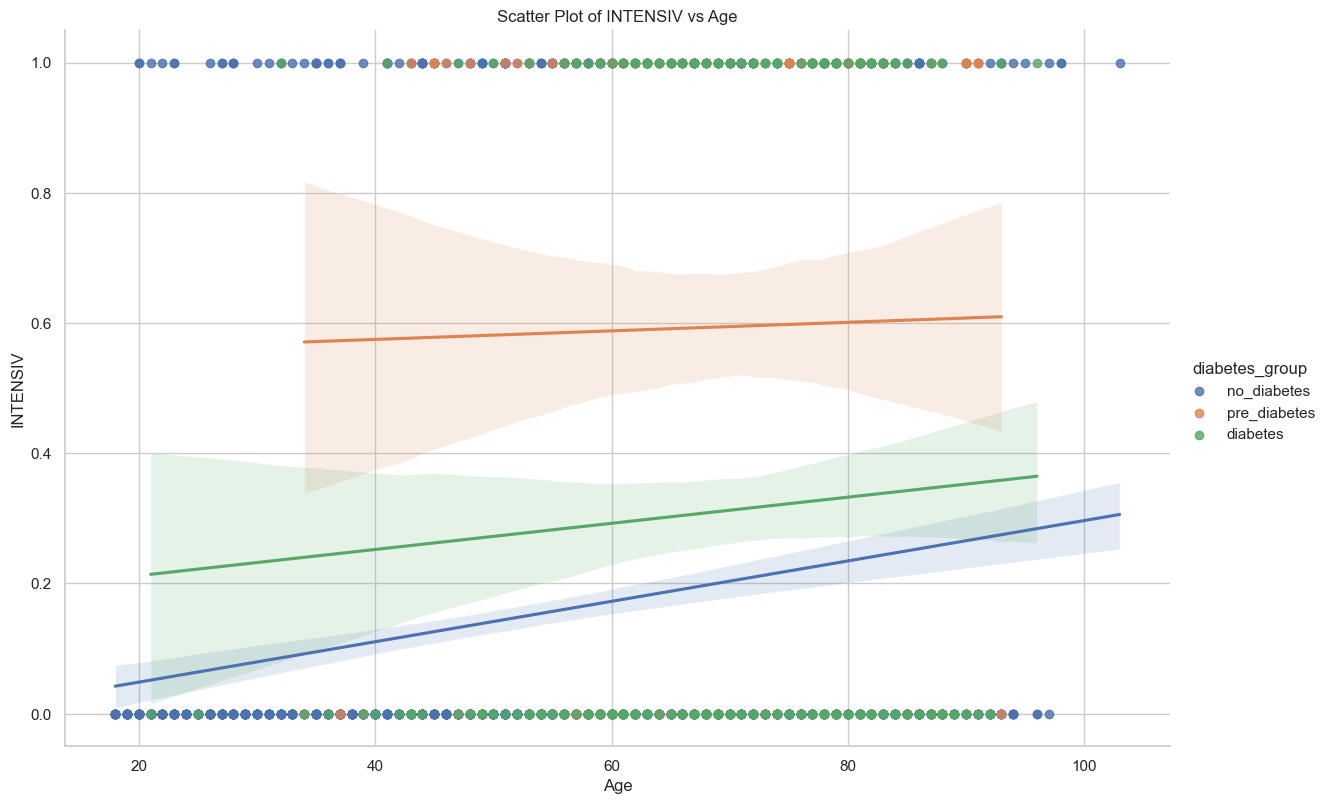



visualize_chi_square_results


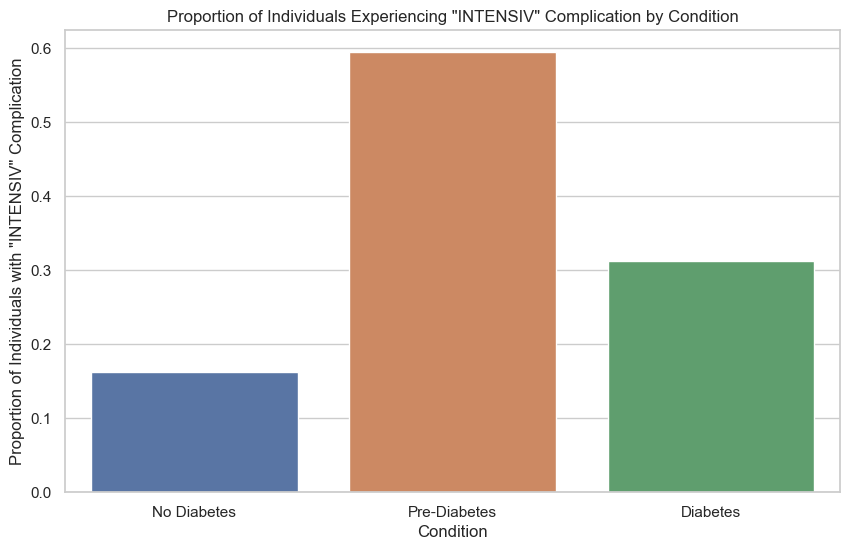



visualize_relative_risk_results


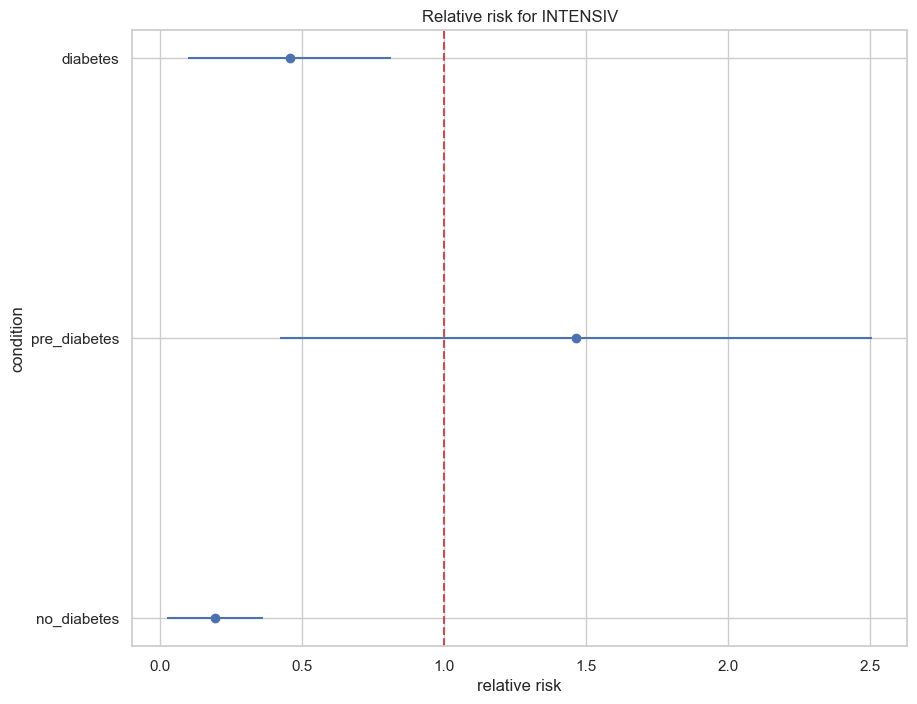



visualize_odds_ratio_results


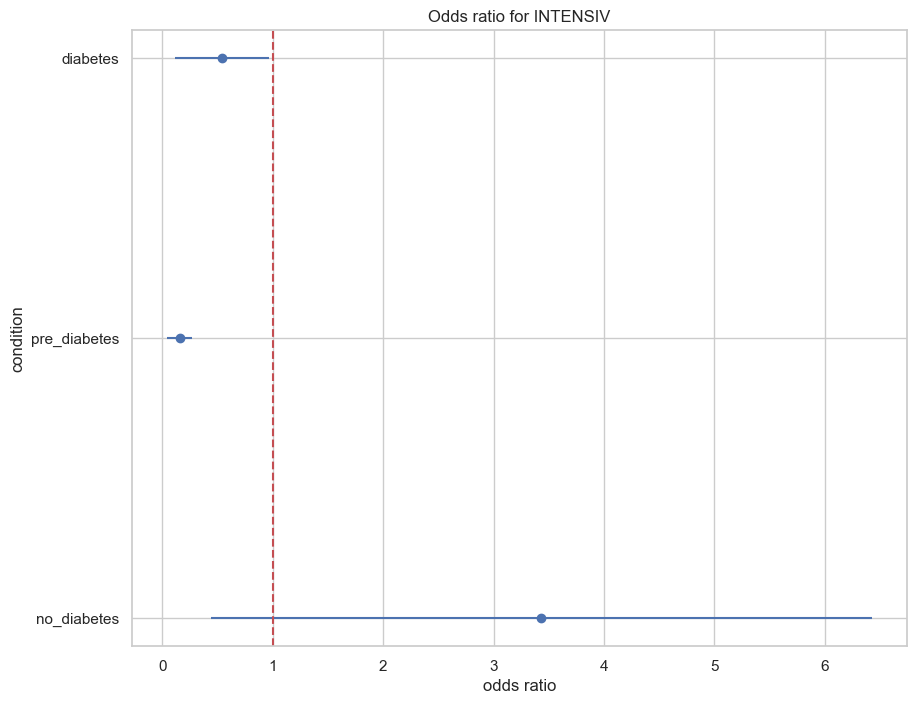



visualize_relative_risk_by_age_results


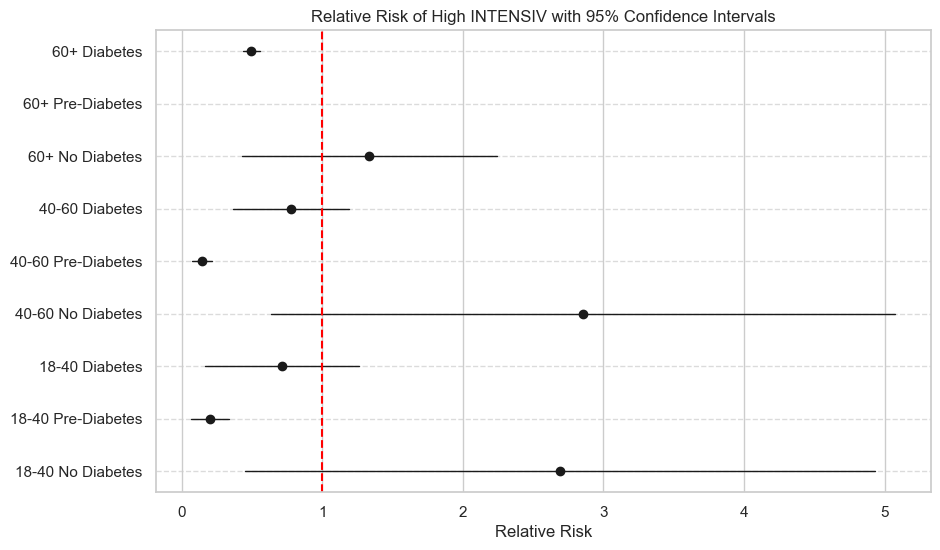

In [42]:
columns_to_test = ['Length of Stay','Fall', 'U69.*', 'T81.*', 'T84.*', 'N17.*', 'I21.*', 'TOD', 'INTENSIV']

for variable_of_interest in columns_to_test:
    run_all_functions(treatment_1, variable_of_interest)
